___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [421]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### Load Dataset

In [422]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [423]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [424]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [425]:
df.shape

(200, 5)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [427]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [428]:
df.drop(columns= "CustomerID", inplace=True)

In [429]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [430]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [431]:
from sklearn.preprocessing import LabelEncoder

In [432]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

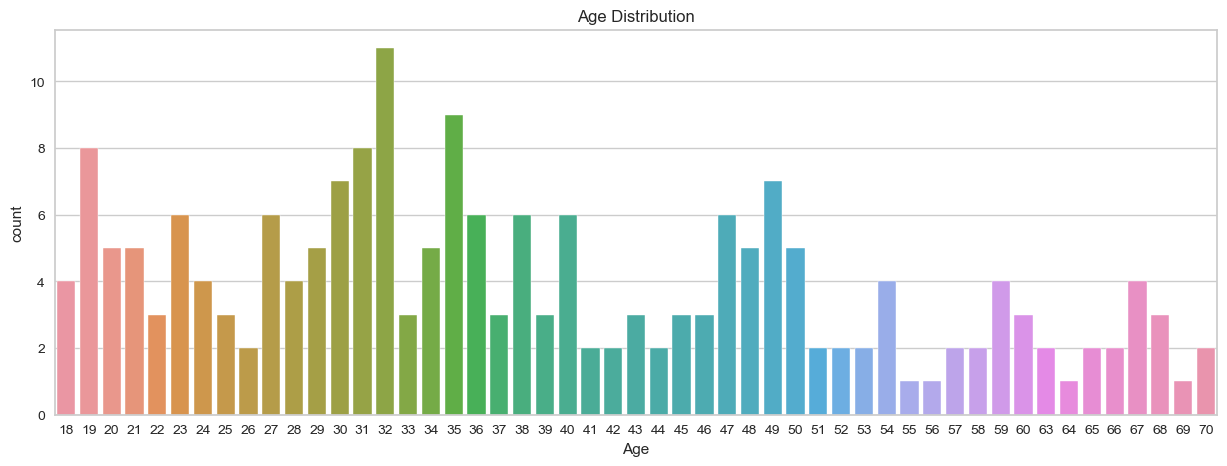

In [433]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

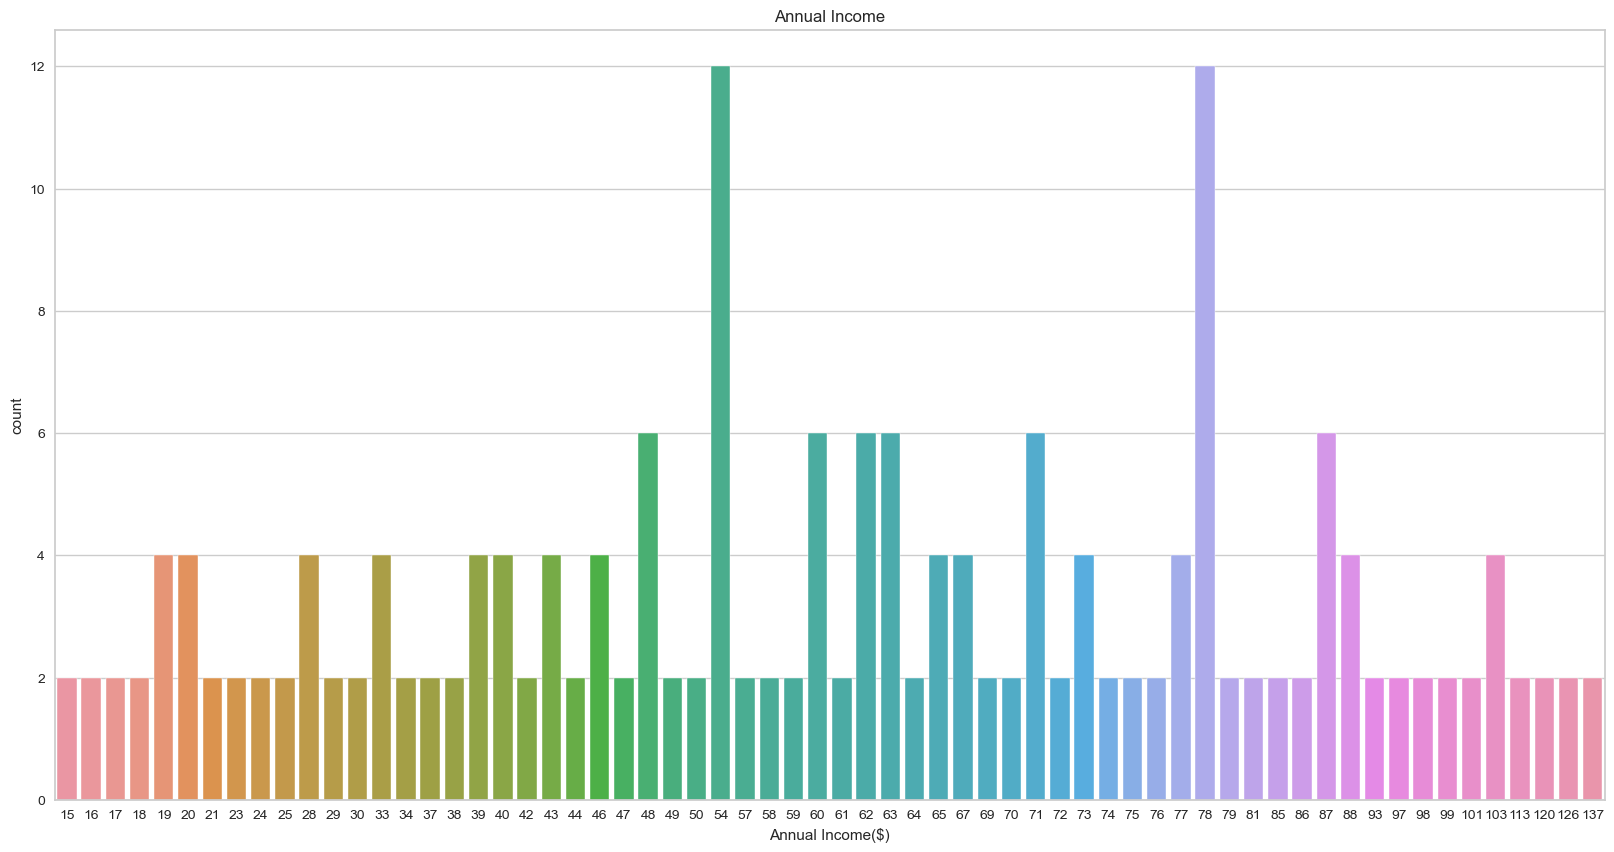

In [434]:
plt.figure(figsize=(20,10))
sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show();

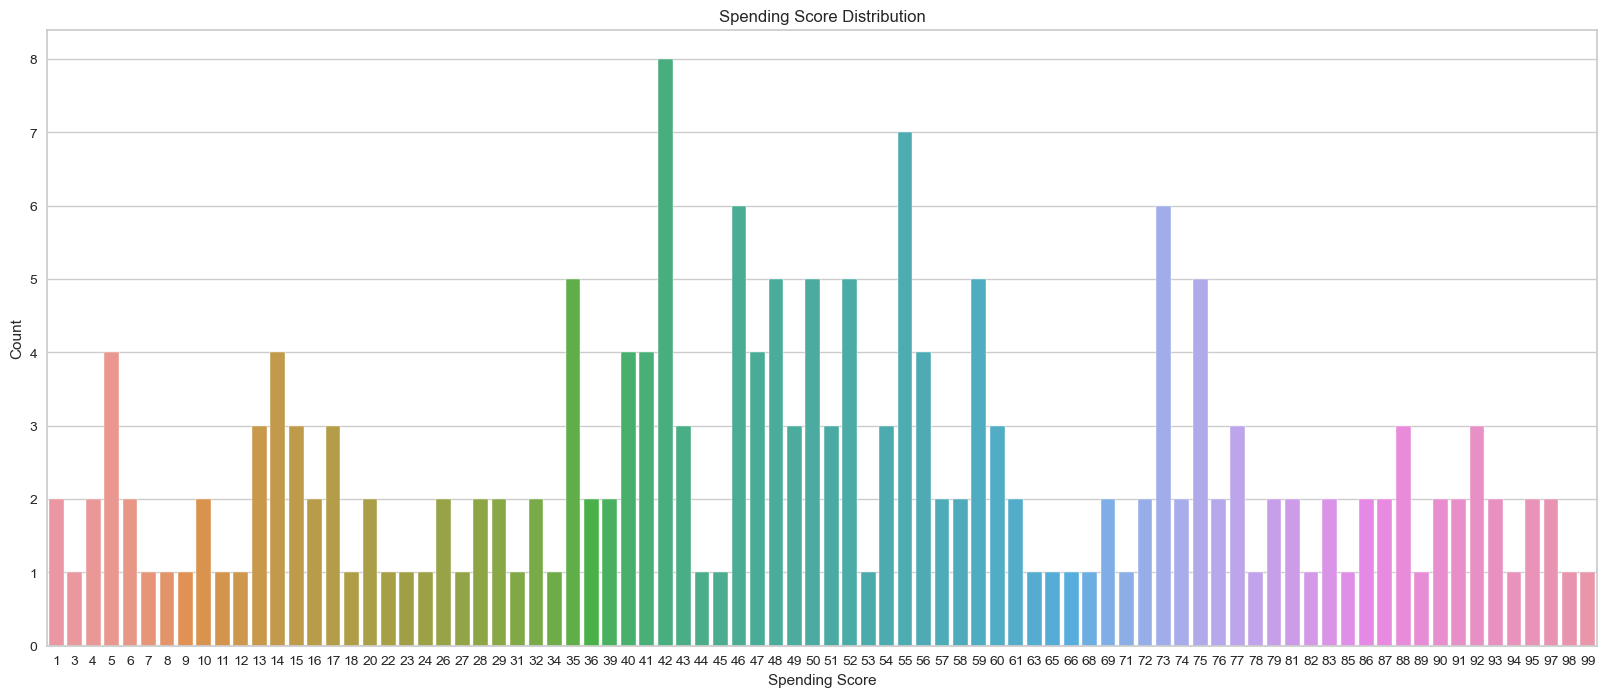

In [435]:
plt.figure(figsize=(20,8))
sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show();

Text(0, 0.5, 'Count')

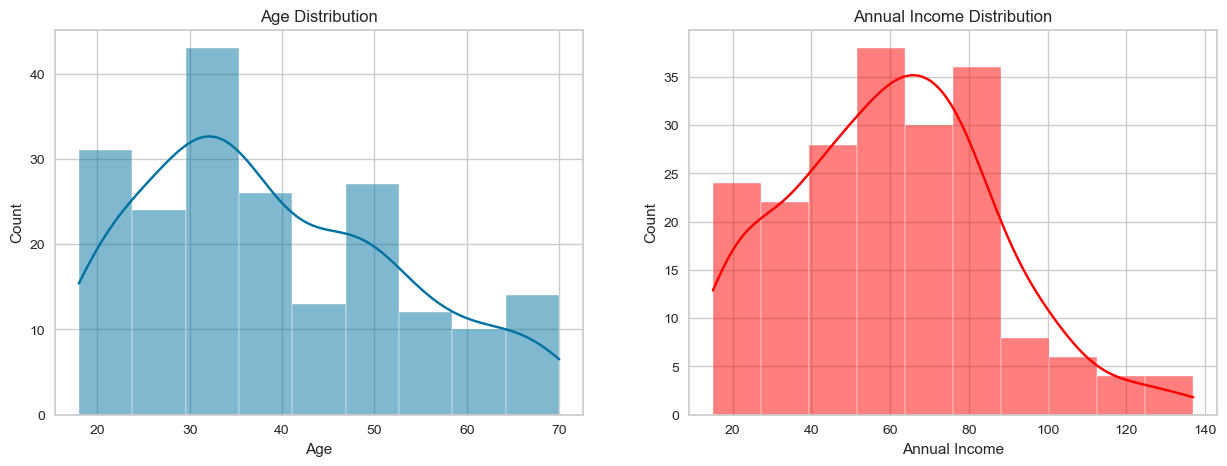

In [436]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

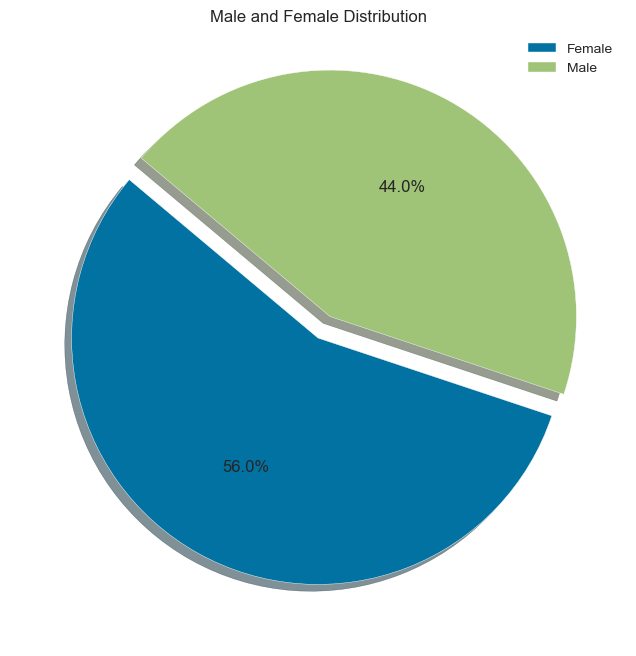

In [437]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

<Axes: >

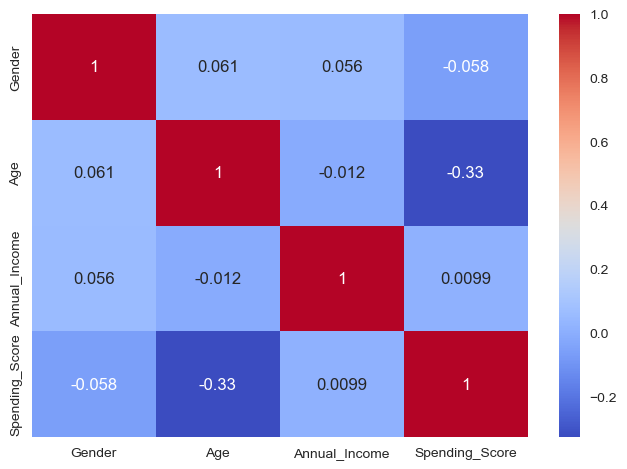

In [438]:
corr=df.corr()
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

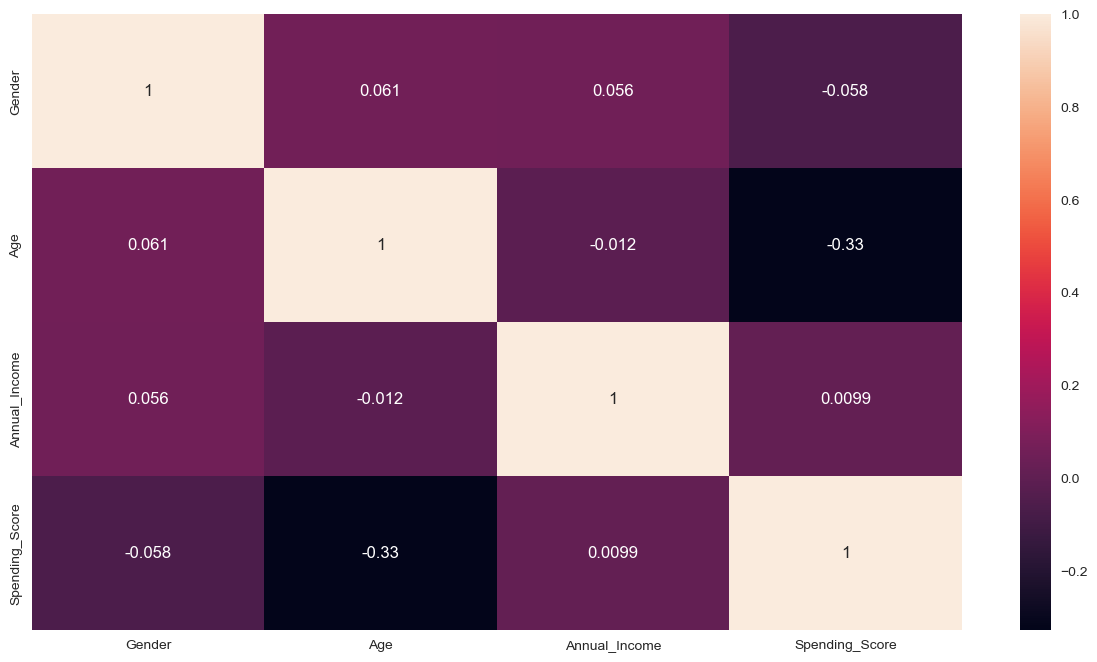

In [439]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

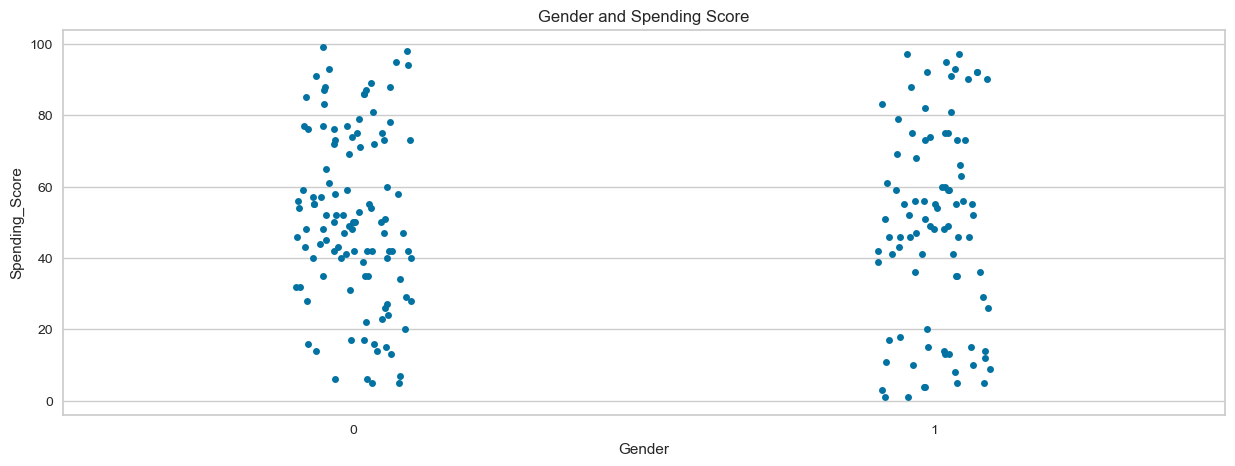

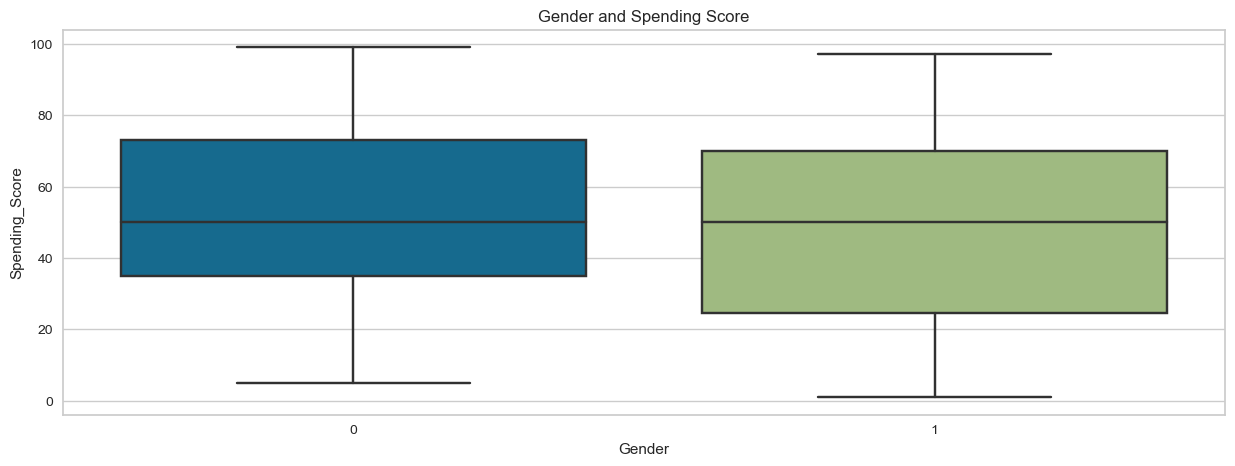

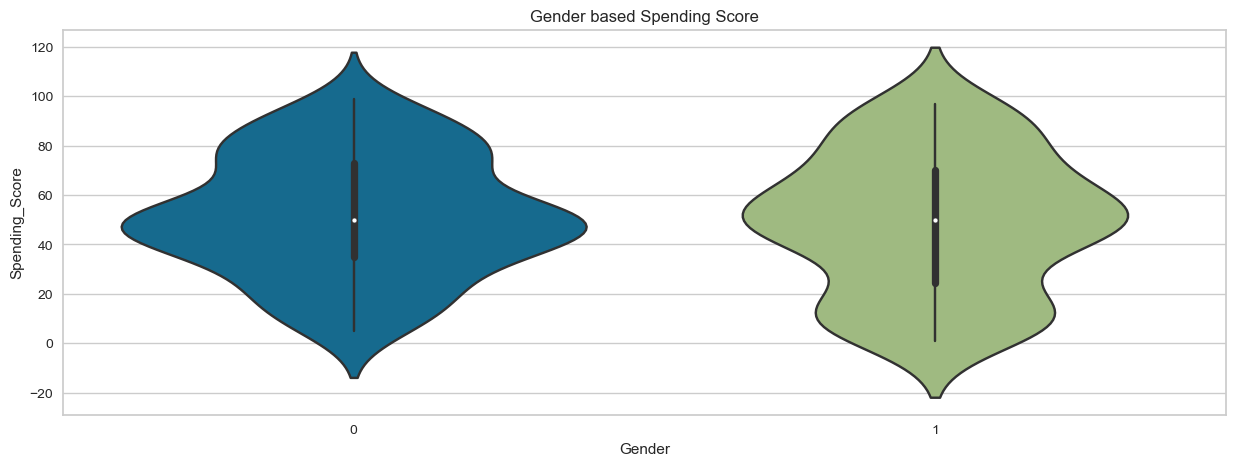

In [440]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

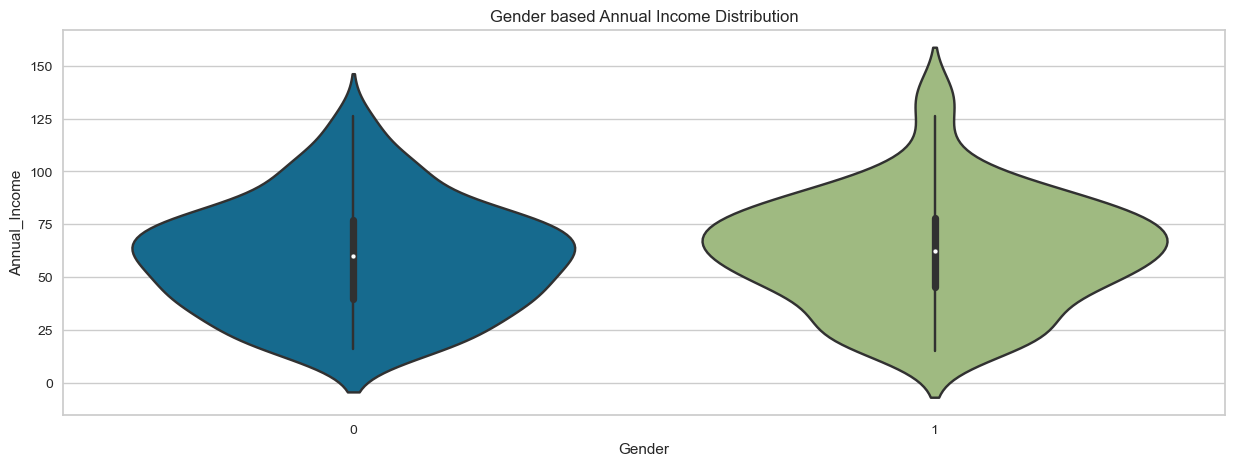

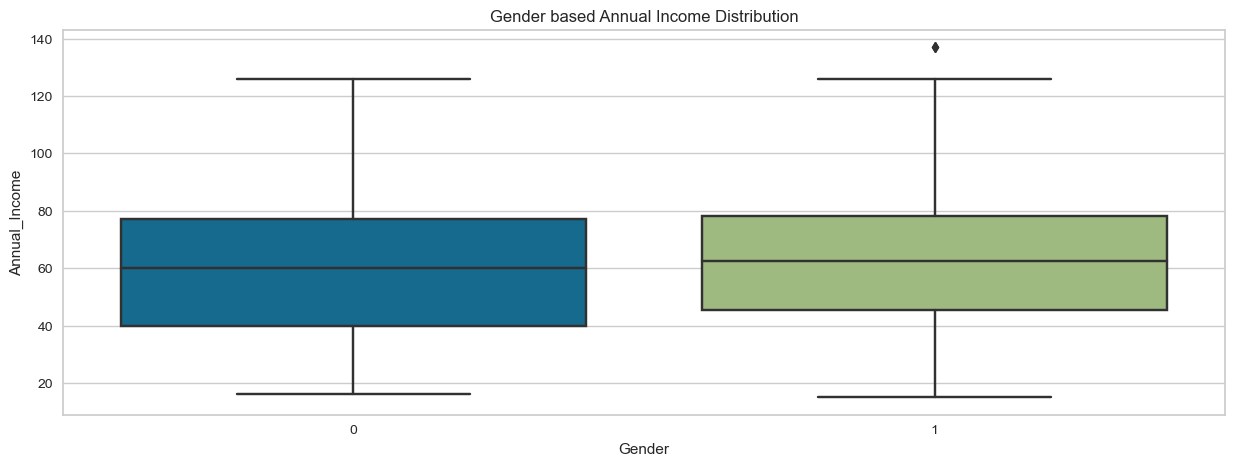

In [441]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

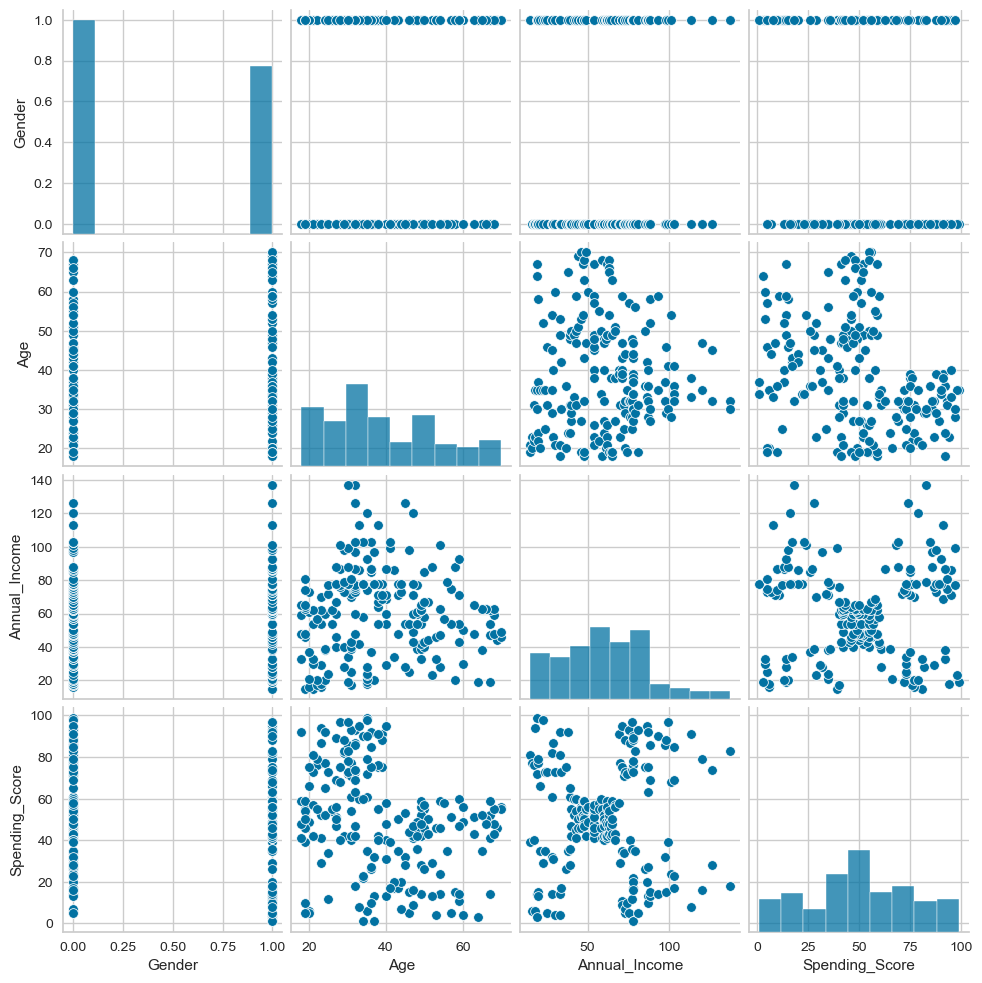

In [442]:
sns.pairplot(df)

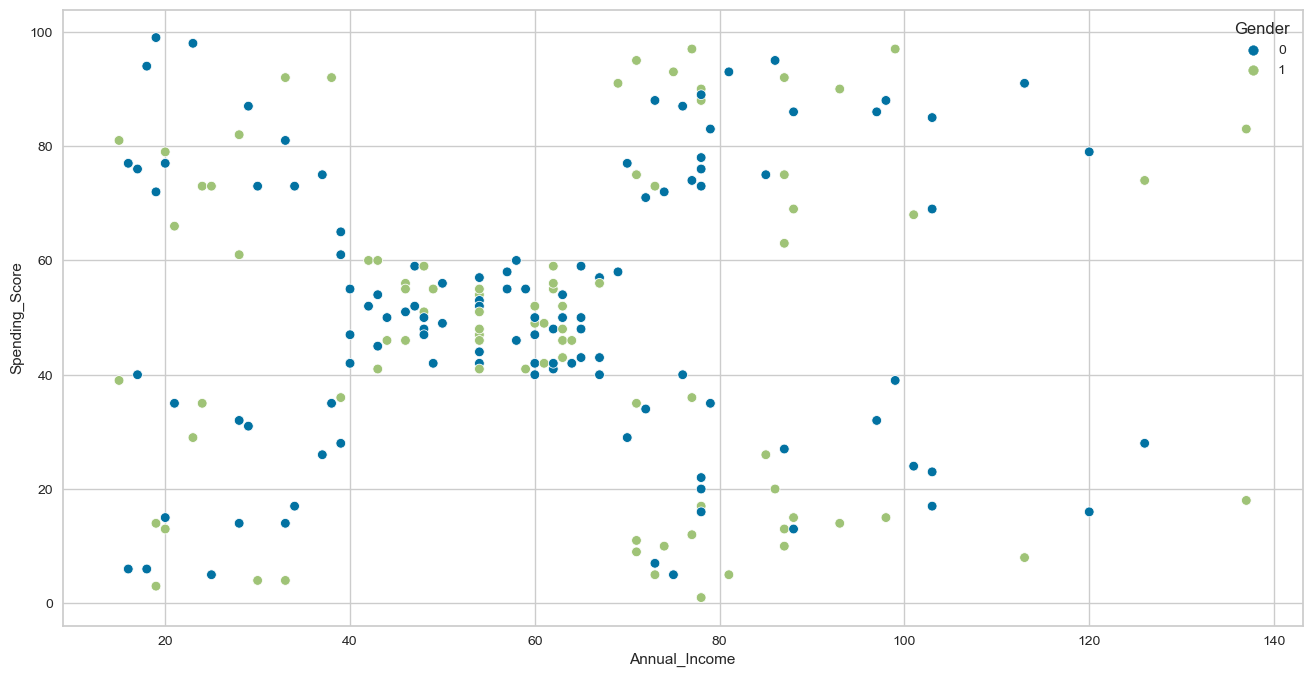

In [443]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [444]:
import sklearn

sklearn.__version__


'1.3.0'

In [445]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [446]:
df1=df[['Age','Spending_Score']]
df1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


<Axes: xlabel='Age', ylabel='Spending_Score'>

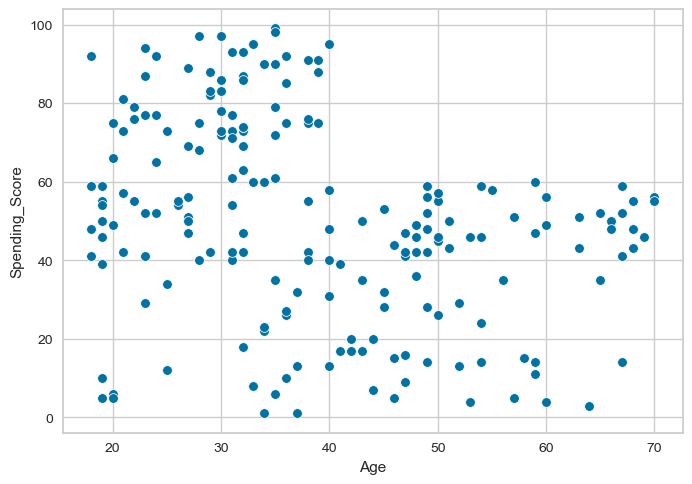

In [447]:
#scatterplot
sns.scatterplot(x='Age',y='Spending_Score', data=df1)

In [448]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):
    
    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [449]:
hopkins(df1, 1)

# With hopkins test, whether the data is uniform or randomly distributed, it returns us a result about it.
# We say that the closer it is to 1, the more prone to data clustering. 

0.7171930867899446

In [450]:
df1 

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [451]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)   

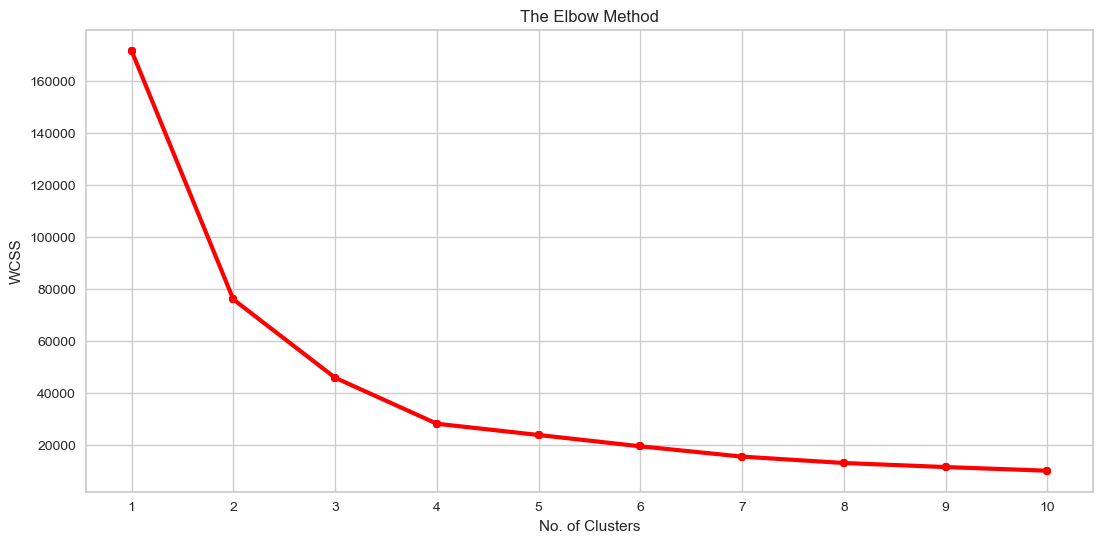

In [452]:
#plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11), errors,linewidth=3, color='red', marker='8')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show() 

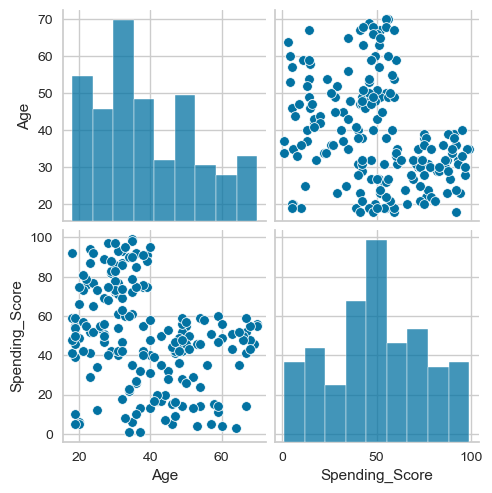

In [453]:
sns.pairplot(df1);

In [454]:
km= KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['Label']=y
df1.head()

,Age,Spending_Score,Label
0,19,39,1
1,21,81,2
2,20,6,4
3,23,77,2
4,31,40,1


In [455]:
km.labels_

array([1, 2, 4, 2, 1, 2, 4, 2, 0, 2, 0, 2, 0, 2, 4, 2, 1, 1, 0, 2, 1, 2,
       0, 2, 0, 2, 0, 1, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 3, 2, 3, 1,
       0, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 4, 2, 3, 2, 0, 2, 0, 2,
       1, 2, 4, 2, 0, 2, 4, 2, 0, 2, 1, 2, 4, 2, 3, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 4, 2, 4, 2, 3, 2, 4, 2, 0, 2, 0, 2, 4, 1, 4, 2, 4, 2, 0, 2,
       0, 2, 0, 2, 4, 2, 0, 2, 1, 2, 0, 2, 4, 2, 4, 2, 4, 2, 0, 2, 0, 2,
       4, 2], dtype=int32)

<Axes: xlabel='Age', ylabel='Spending_Score'>

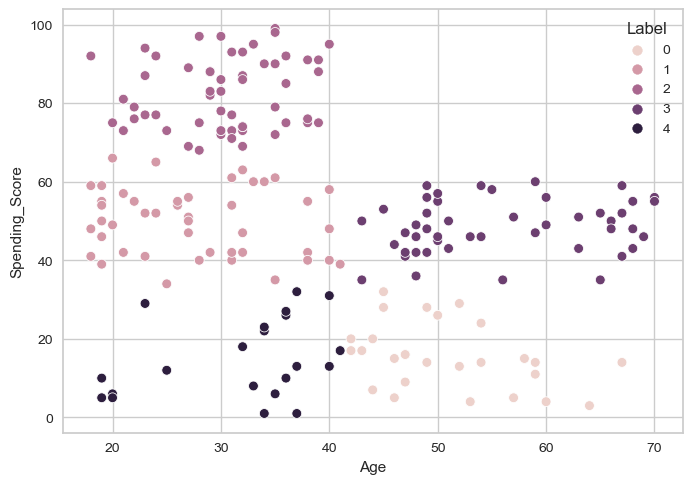

In [456]:
sns.scatterplot(x='Age',y='Spending_Score', data=df1, hue='Label', s=50)

Text(0.5, 1.0, 'elbow method')

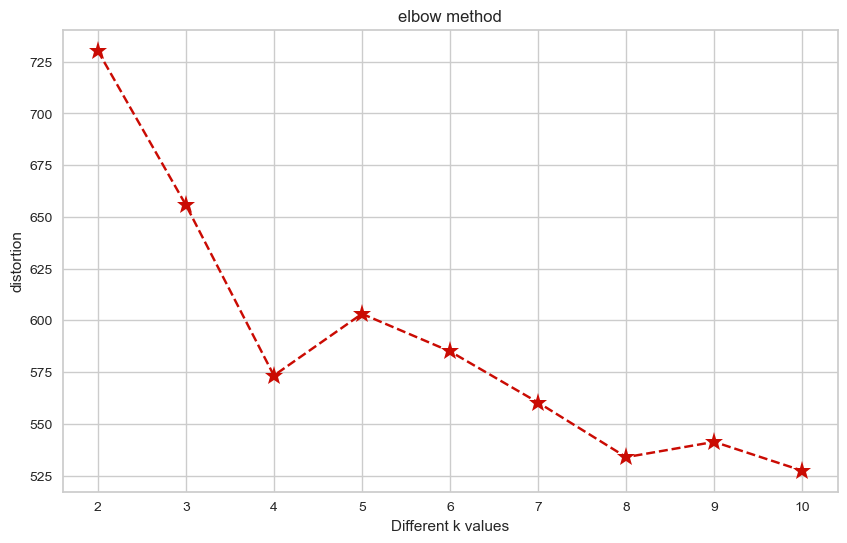

In [457]:
K =range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df1)
    distances = kmeanModel.transform(df1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [458]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4684085077933854
For n_clusters=3, the silhouette score is 0.45193391294873464
For n_clusters=4, the silhouette score is 0.49973124624363563
For n_clusters=5, the silhouette score is 0.47108363311644014
For n_clusters=6, the silhouette score is 0.44175188696814444
For n_clusters=7, the silhouette score is 0.42488511702497544
For n_clusters=8, the silhouette score is 0.4319975521567828
For n_clusters=9, the silhouette score is 0.41113024987819047
For n_clusters=10, the silhouette score is 0.3920157392722099


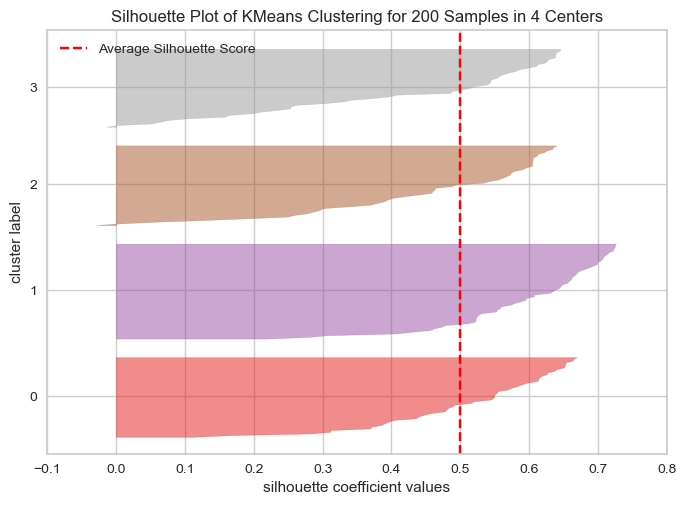

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [459]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1)  # Fit the data to the visualizer
visualizer.poof()

In [460]:
model3.n_clusters

4

In [461]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(df1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [462]:
df3 = df1.copy()
df3

,Age,Spending_Score,Label
0,19,39,1
1,21,81,2
2,20,6,4
3,23,77,2
4,31,40,1
...,...,...,...
195,35,79,2
196,45,28,0
197,32,74,2
198,32,18,4


In [463]:
df3["cluster_Kmeans"] = kmeans.fit_predict(df1)

In [464]:
df3

,Age,Spending_Score,Label,cluster_Kmeans
0,19,39,1,3
1,21,81,2,1
2,20,6,4,2
3,23,77,2,1
4,31,40,1,3
...,...,...,...,...
195,35,79,2,1
196,45,28,0,2
197,32,74,2,1
198,32,18,4,2


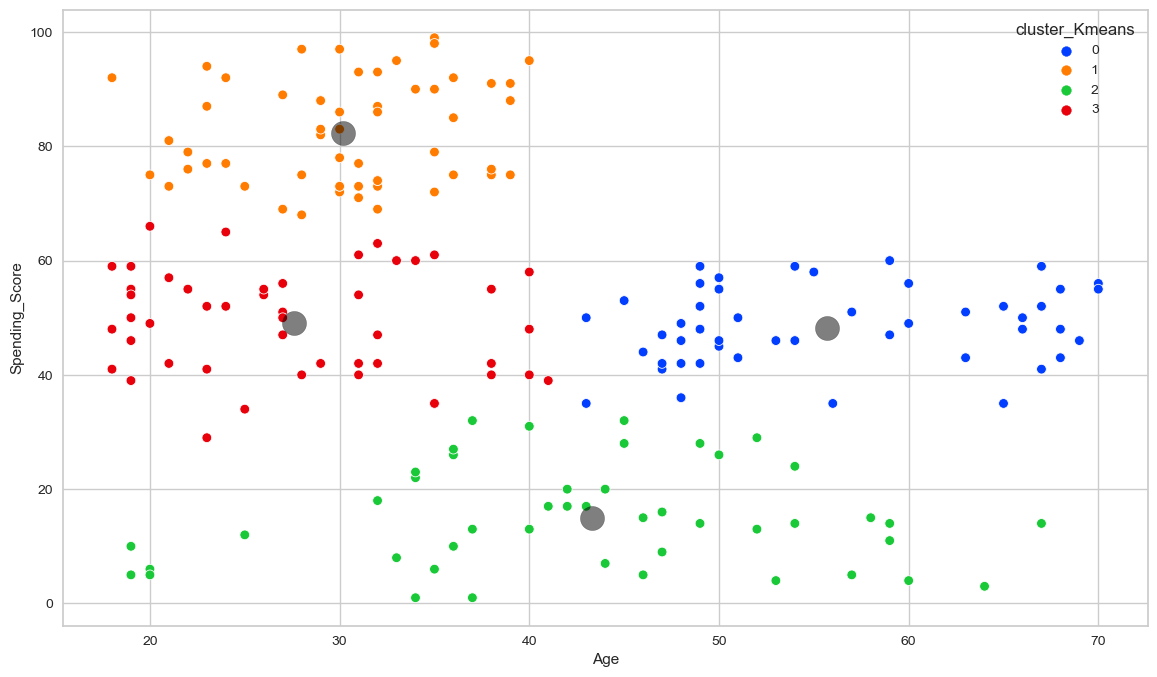

In [465]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df3,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
# We look at clusters and centroids formed by age and spending score.

### Clustering based on Annual Income and Spending Score

In [466]:
df2=df[['Annual_Income','Spending_Score']]
df2.head()


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [467]:
hopkins(df2, 1)

0.6809298573736983

In [468]:
errors=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

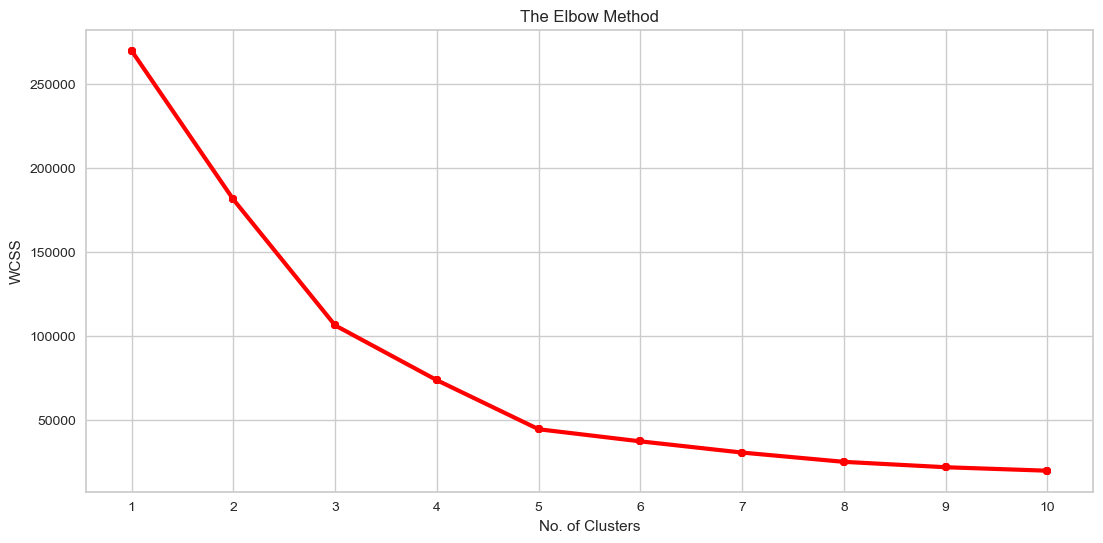

In [469]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11), errors,linewidth=3, color='red', marker='8')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [470]:
km= KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['Label']=y
df2.head()

,Annual_Income,Spending_Score,Label
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


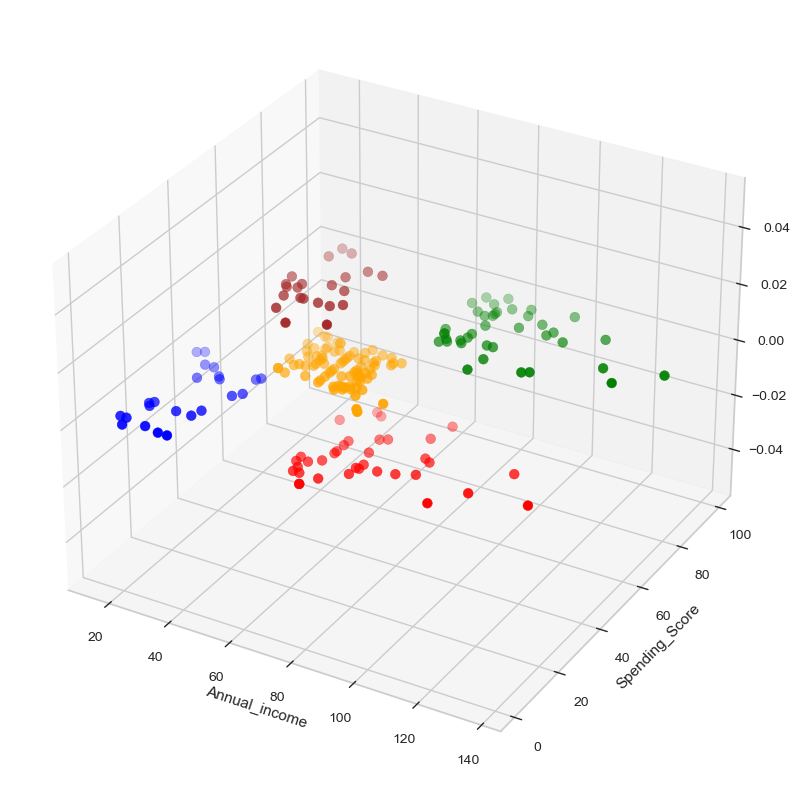

In [471]:
#3d scatterplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df2['Annual_Income'][df2['Label']==0], df2['Spending_Score'][df2['Label']==0],c='red',s=50)
ax.scatter(df2['Annual_Income'][df2['Label']==1], df2['Spending_Score'][df2['Label']==1],c='blue',s=50)
ax.scatter(df2['Annual_Income'][df2['Label']==2], df2['Spending_Score'][df2['Label']==2],c='green',s=50)
ax.scatter(df2['Annual_Income'][df2['Label']==3], df2['Spending_Score'][df2['Label']==3],c='orange',s=50)
ax.scatter(df2['Annual_Income'][df2['Label']==4], df2['Spending_Score'][df2['Label']==4],c='brown',s=50)
ax.set_xlabel('Annual_income')
ax.set_ylabel('Spending_Score')
plt.show()

### Why silhouette_score is negative?

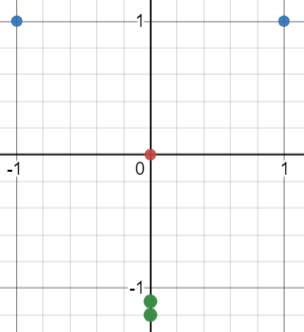

In [472]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.29665468726009153
For n_clusters=3, the silhouette score is 0.4677642146823002
For n_clusters=4, the silhouette score is 0.4937128838722982
For n_clusters=5, the silhouette score is 0.5546548926958963
For n_clusters=6, the silhouette score is 0.540452676570224
For n_clusters=7, the silhouette score is 0.529188114574343
For n_clusters=8, the silhouette score is 0.45822449544478444
For n_clusters=9, the silhouette score is 0.4584910501388805
For n_clusters=10, the silhouette score is 0.4447647339913975


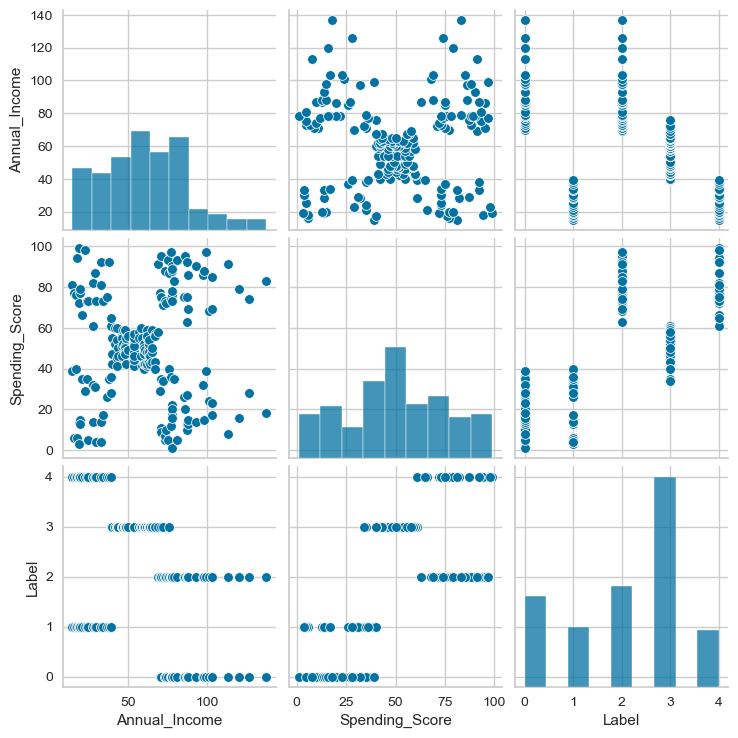

In [473]:
sns.pairplot(df2)

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- df1

In [474]:
df1

,Age,Spending_Score,Label
0,19,39,1
1,21,81,2
2,20,6,4
3,23,77,2
4,31,40,1
...,...,...,...
195,35,79,2
196,45,28,0
197,32,74,2
198,32,18,4


In [479]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [485]:
from ipywidgets import interact

In [285]:
from scipy.cluster.hierarchy import linkage

In [394]:
hc_ward = linkage(y = df1, method = "ward")
hc_complete = linkage(df1, "complete")
hc_average = linkage(df1, "average")
hc_single = linkage(df1, "single")



In [395]:
from scipy.cluster.hierarchy import dendrogram

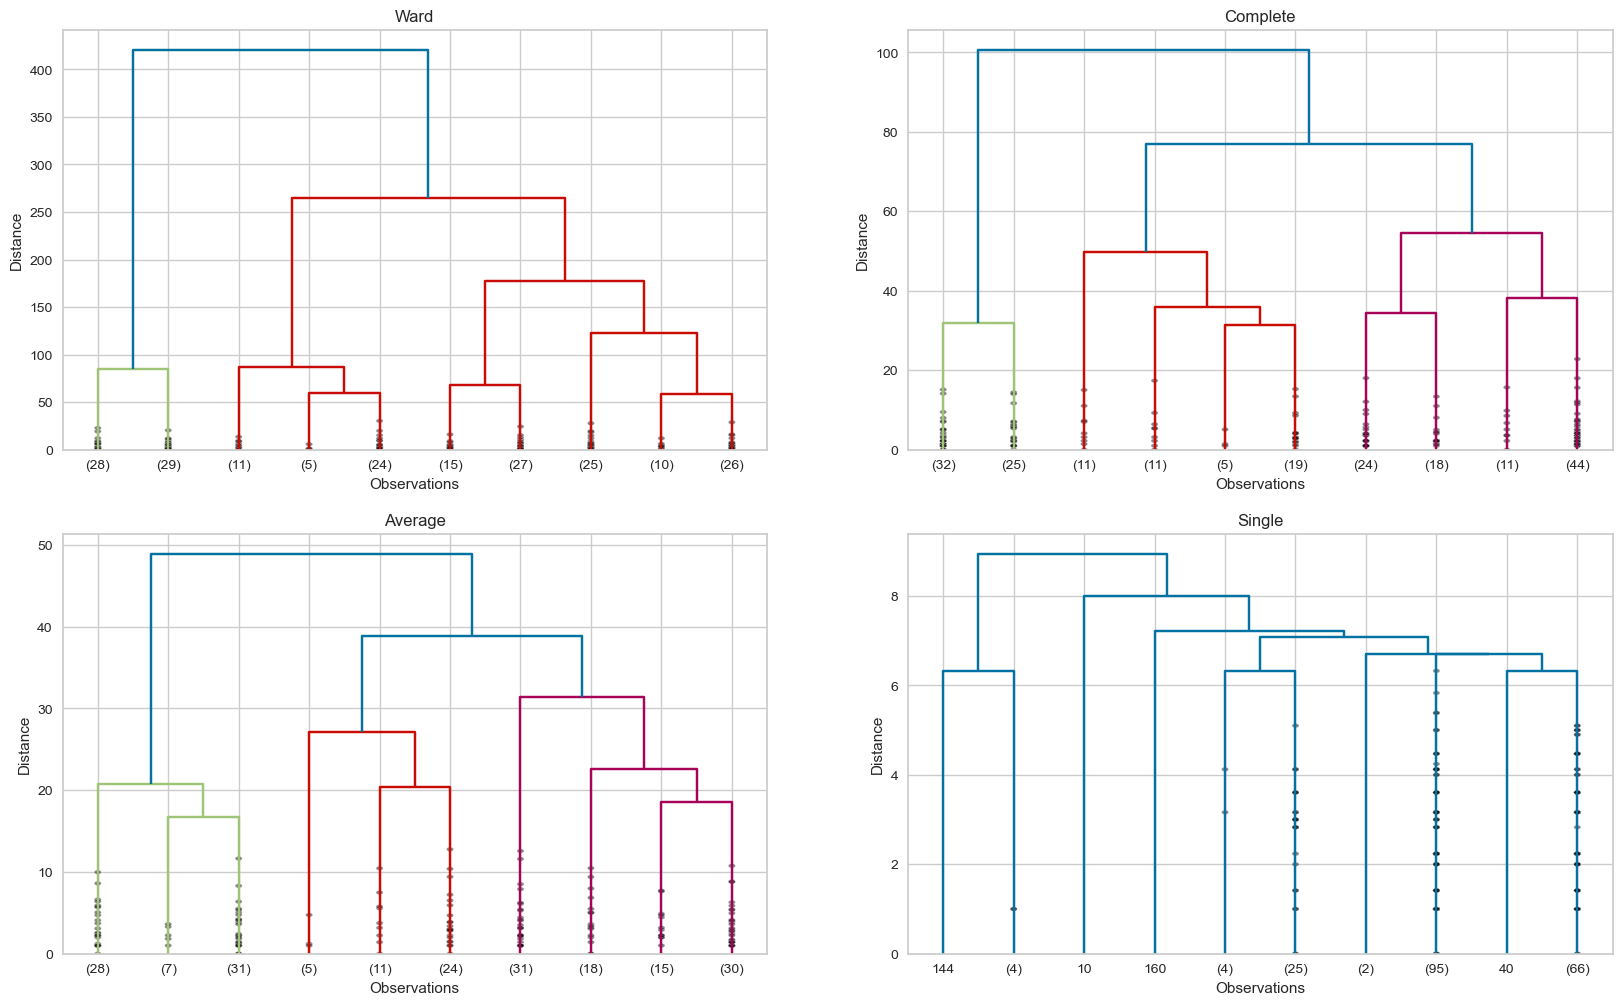

In [396]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

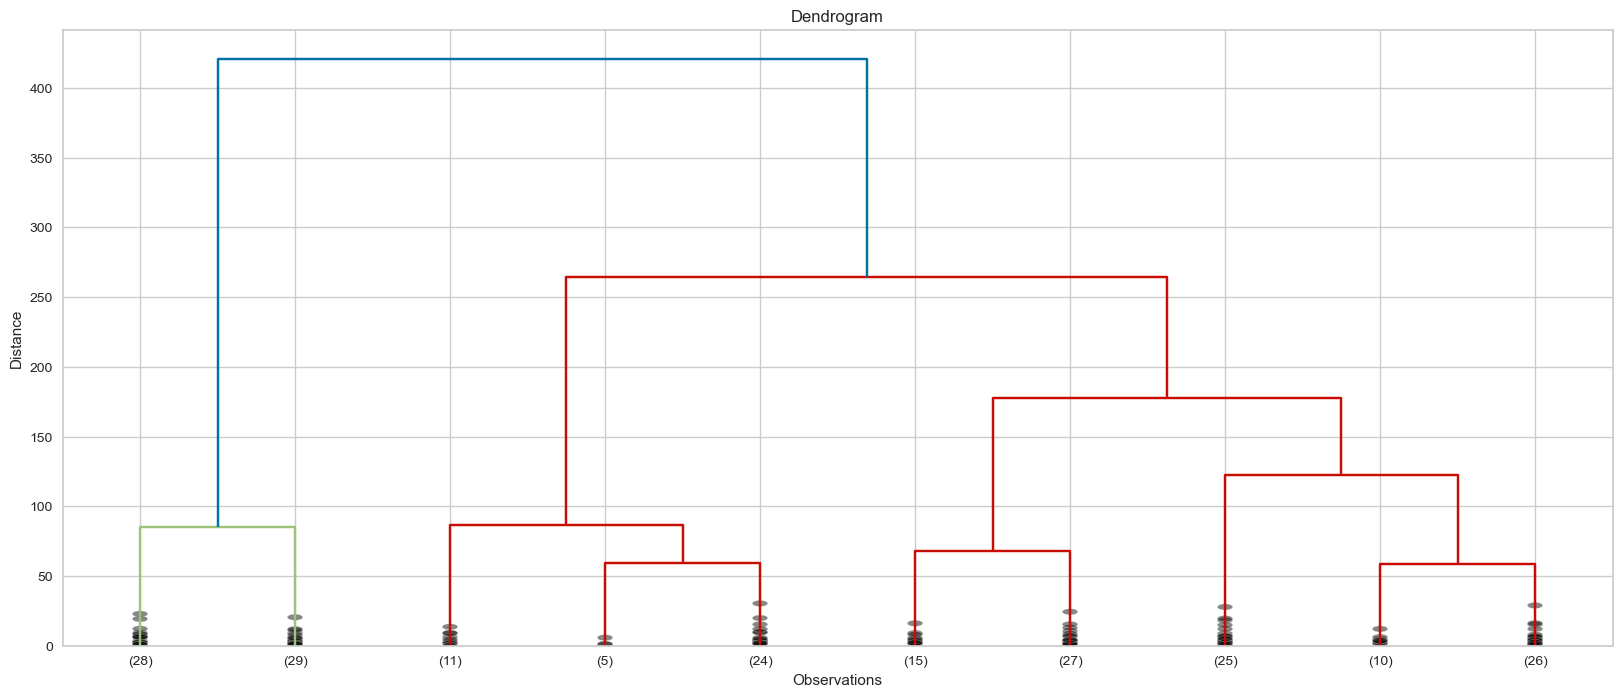

In [397]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [398]:
from sklearn.cluster import AgglomerativeClustering

In [399]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4543053753529408
For n_clusters=3, the silhouette score is 0.4402393850118629
For n_clusters=4, the silhouette score is 0.46290918777992296
For n_clusters=5, the silhouette score is 0.4168263932043563
For n_clusters=6, the silhouette score is 0.4194294412179385
For n_clusters=7, the silhouette score is 0.3876721834114992
For n_clusters=8, the silhouette score is 0.37572141923267866
For n_clusters=9, the silhouette score is 0.38207954365185953
For n_clusters=10, the silhouette score is 0.38564456588412727


## Clustering based on Annual Income and Spending Score- df2

In [400]:
from scipy.cluster.hierarchy import linkage

In [401]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

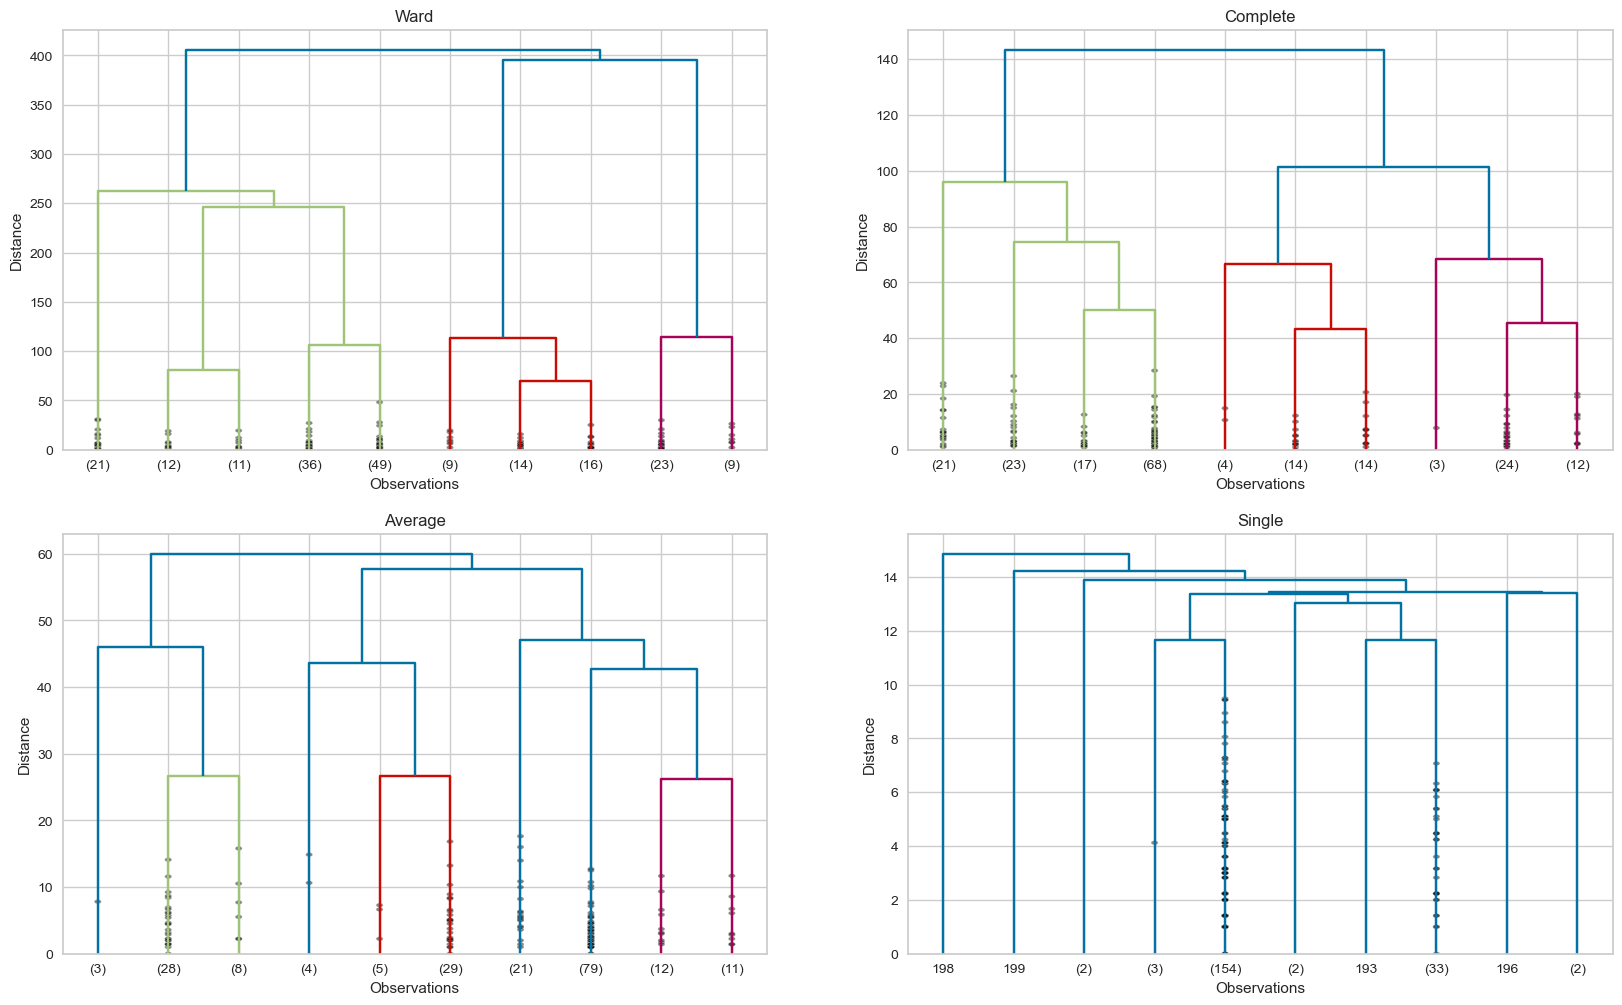

In [402]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

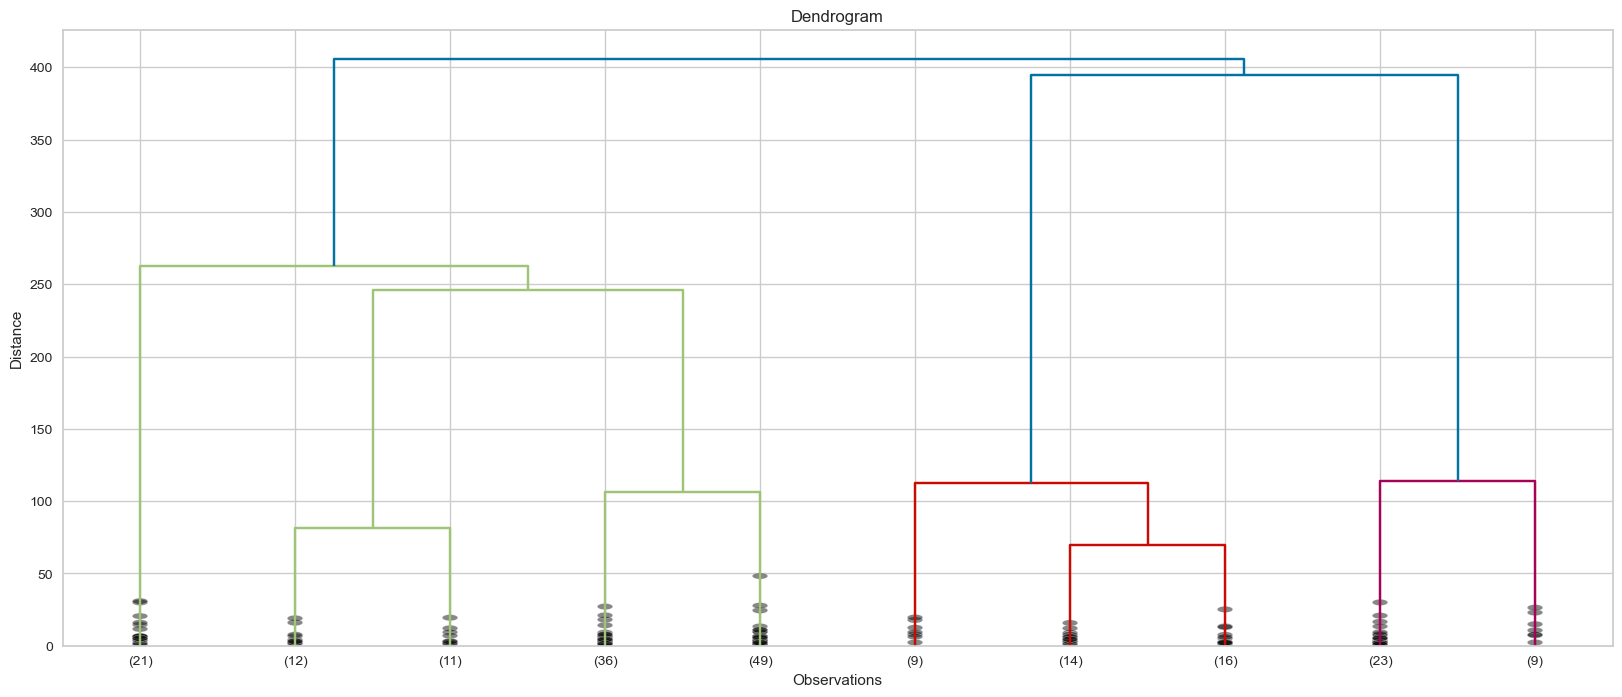

In [403]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [404]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36679669332660525
For n_clusters=3, the silhouette score is 0.4616390109668718
For n_clusters=4, the silhouette score is 0.491574138093207
For n_clusters=5, the silhouette score is 0.5536239356031518
For n_clusters=6, the silhouette score is 0.5386340881973769
For n_clusters=7, the silhouette score is 0.5204813182287933
For n_clusters=8, the silhouette score is 0.43302150492505326
For n_clusters=9, the silhouette score is 0.43935101260658327
For n_clusters=10, the silhouette score is 0.4346769600171265


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- df1

In [496]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(df1)

In [497]:
df1['cluster_Agg'] = y_agg
df1.head()

,Age,Spending_Score,Label,cluster_Agg
0,19,39,1,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0


#### Annual Income and Spending Score- df2

In [500]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2= Agg2.fit_predict(df2)

In [501]:
df2['cluster_Agg'] = y_agg2
df2.head()

,Annual_Income,Spending_Score,Label,cluster_Agg
0,15,39,1,4
1,15,81,4,3
2,16,6,1,4
3,16,77,4,3
4,17,40,1,4


#### Age and Spending Score- df1

<Axes: xlabel='Age', ylabel='Spending_Score'>

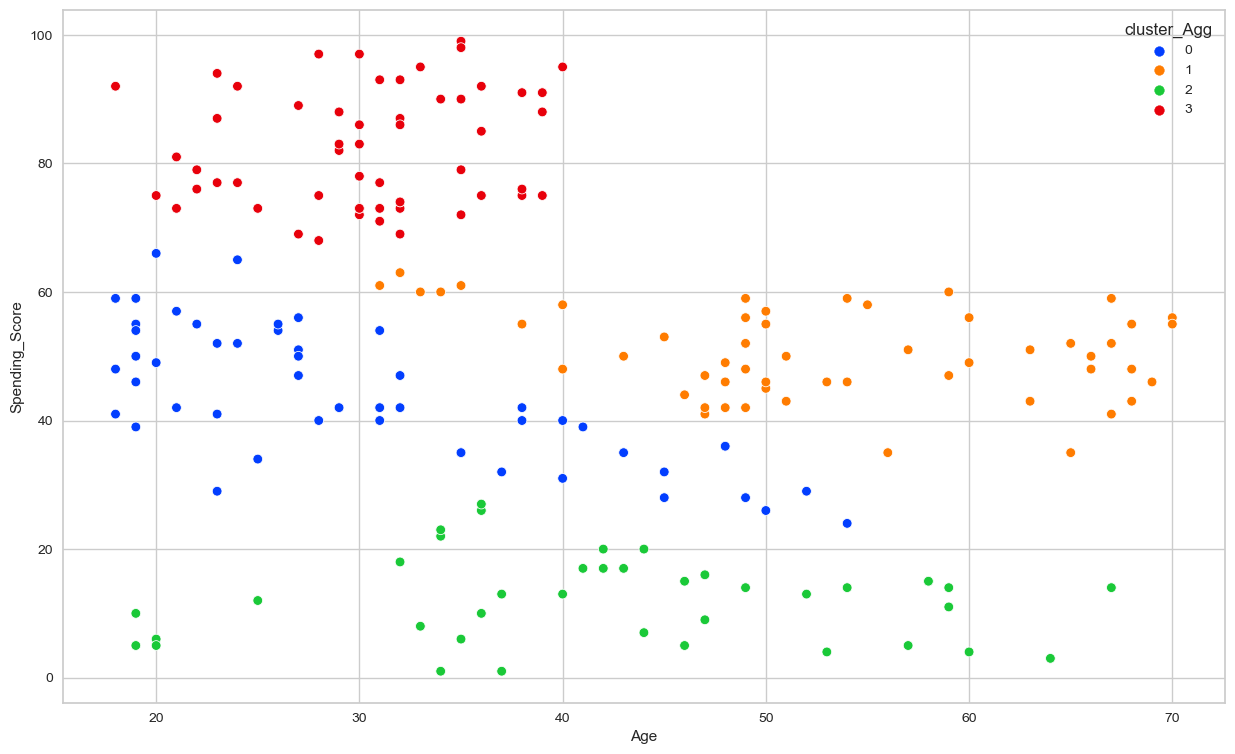

In [502]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=x1, palette="bright")

Text(0.5, 1.0, 'Agg')

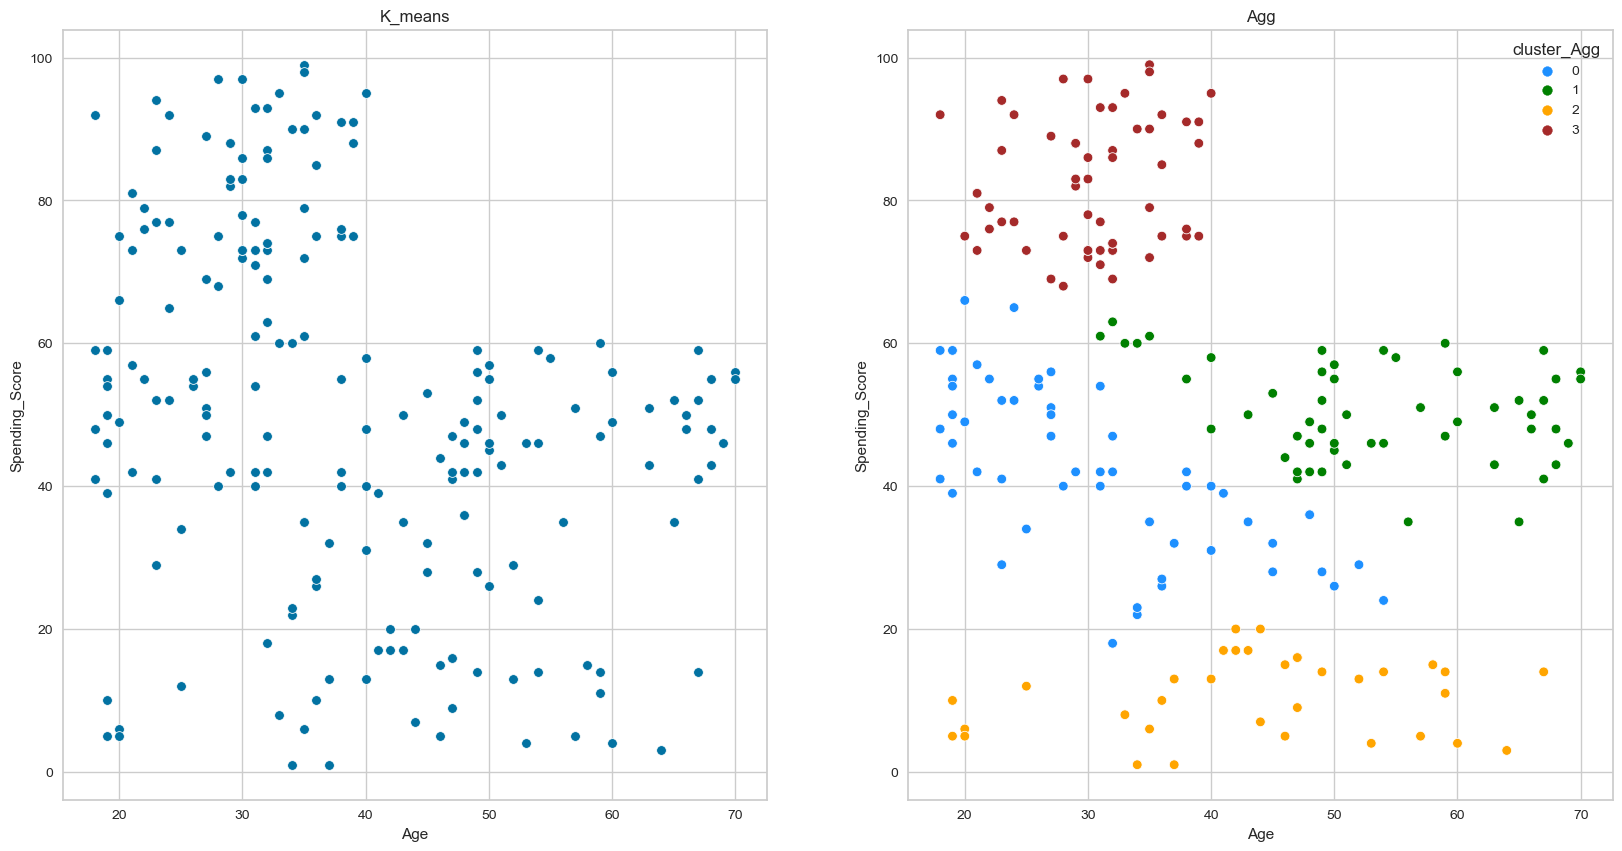

In [503]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score',  data=df1,palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=df1,palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score- df2

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

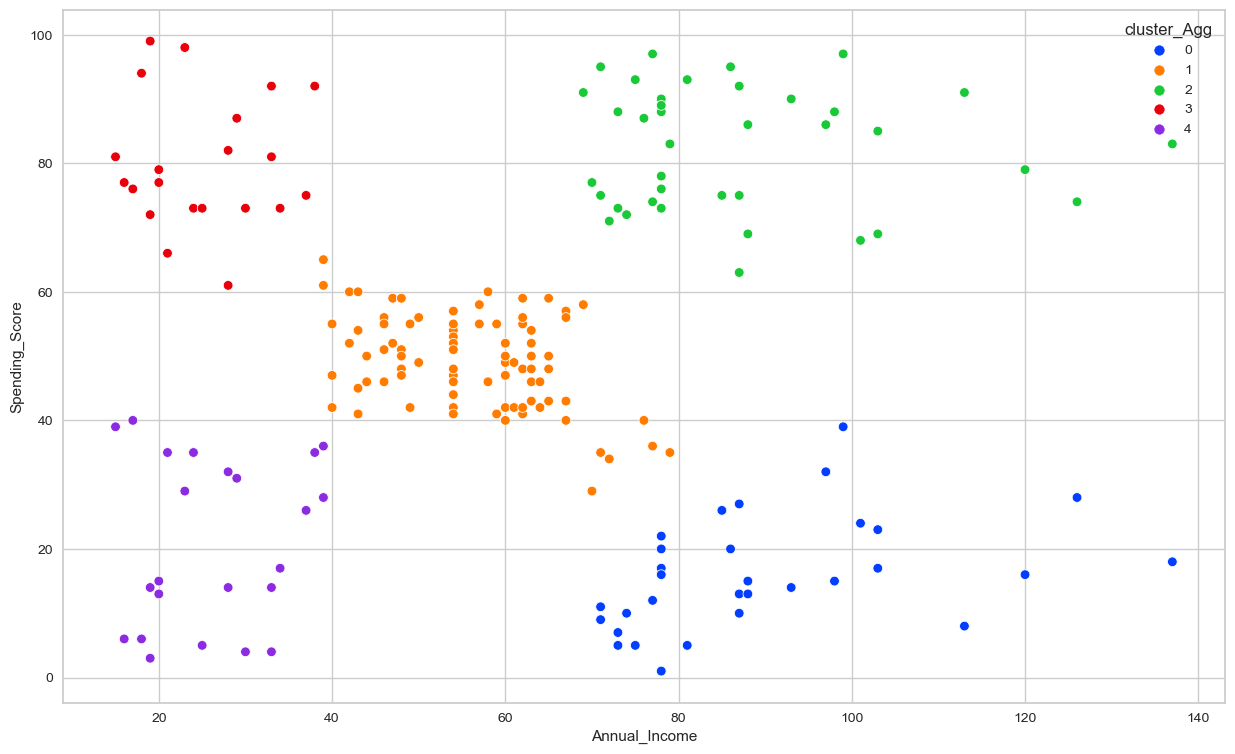

In [504]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df2 ,palette="bright")

Text(0.5, 1.0, 'Agg')

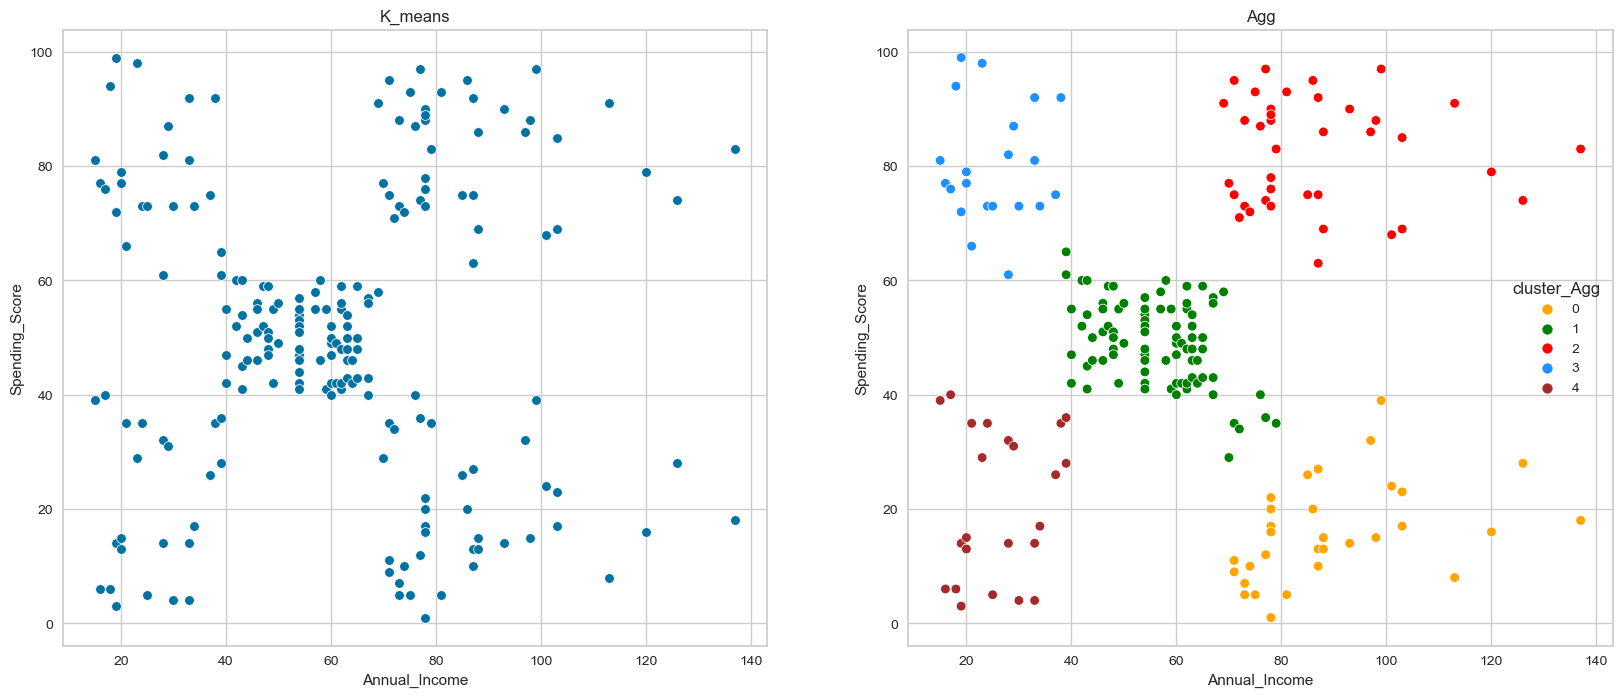

In [505]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- df1

In [506]:
df1.head()

,Age,Spending_Score,Label,cluster_Agg
0,19,39,1,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0


In [507]:
df1.value_counts()

Age  Spending_Score  Label  cluster_Agg
47   16              0      2              2
48   36              3      0              2
21   81              2      3              2
58   15              0      2              2
35   35              1      0              2
                                          ..
32   18              4      0              1
     42              1      0              1
     47              1      0              1
     63              1      1              1
70   56              3      1              1
Name: count, Length: 192, dtype: int64

In [508]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### iii. *Visualizing and Labeling All the Clusters*

In [509]:
df1

,Age,Spending_Score,Label,cluster_Agg
0,19,39,1,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0
...,...,...,...,...
195,35,79,2,3
196,45,28,0,0
197,32,74,2,3
198,32,18,4,0


<Axes: xlabel='Age', ylabel='Spending_Score'>

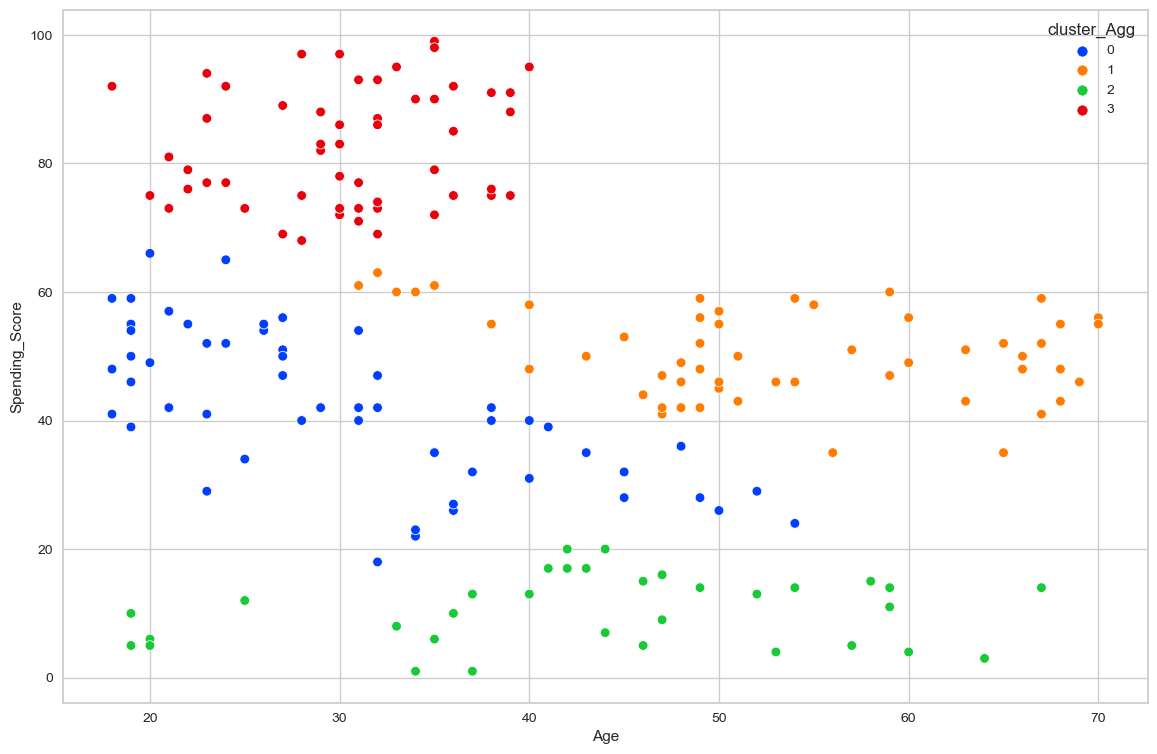

In [510]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data= df1,
                palette="bright")

In [512]:
df2

,Annual_Income,Spending_Score,Label,cluster_Agg
0,15,39,1,4
1,15,81,4,3
2,16,6,1,4
3,16,77,4,3
4,17,40,1,4
...,...,...,...,...
195,120,79,2,2
196,126,28,0,0
197,126,74,2,2
198,137,18,0,0


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

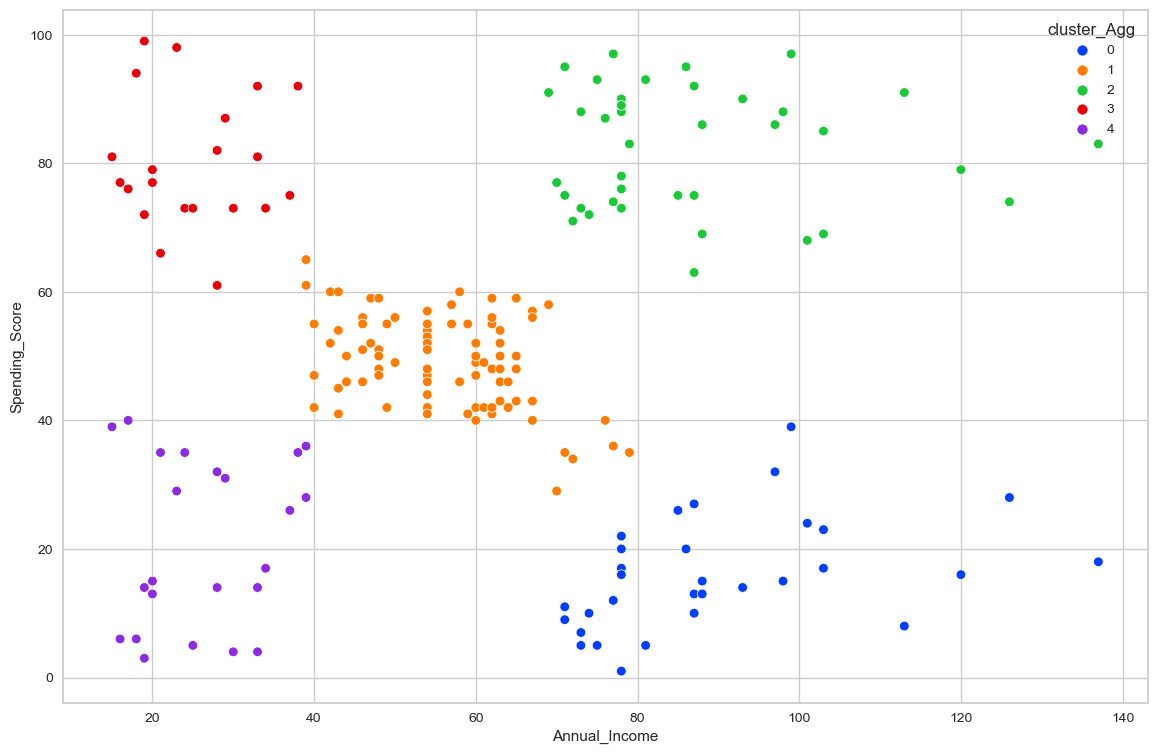

In [513]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df2 ,
                palette="bright")

In [515]:
df1

,Age,Spending_Score,Label,cluster_Agg
0,19,39,1,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0
...,...,...,...,...
195,35,79,2,3
196,45,28,0,0
197,32,74,2,3
198,32,18,4,0


In [520]:
df1['cluster_Kmeans'] = kmeans.fit_predict(df1)


[Text(0, 0, '30'),
 Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '23'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '18'),
 Text(0, 0, '15'),
 Text(0, 0, '12'),
 Text(0, 0, '9')]

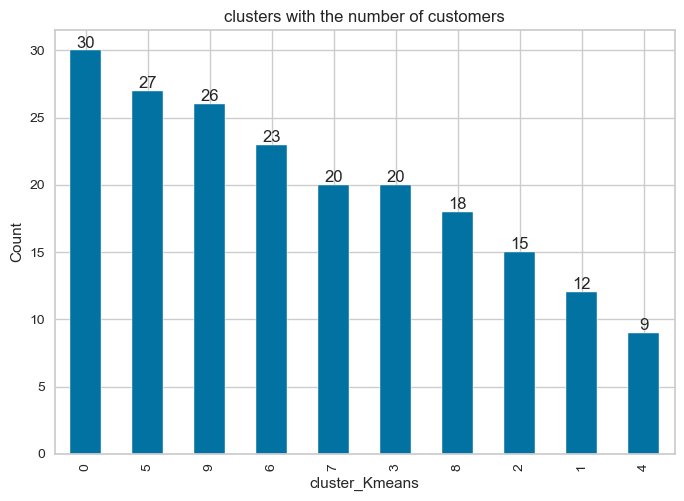

In [521]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [522]:
df["cluster_Age_Spending_Score"] = df1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,1,19,15,39,2
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,2


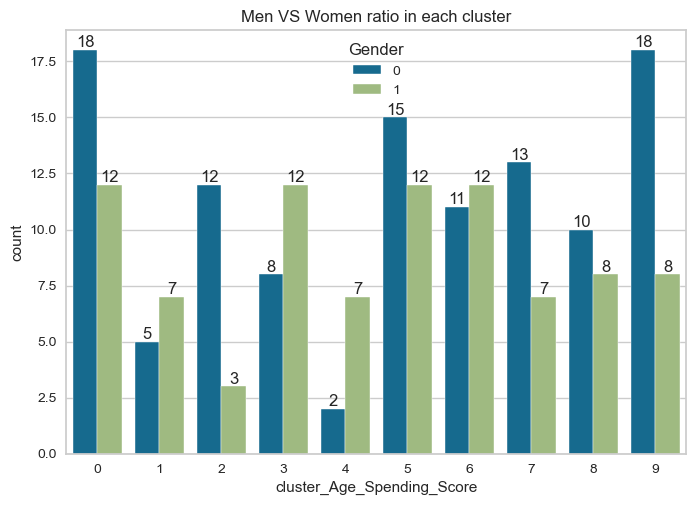

In [523]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [524]:
df.groupby("cluster_Age_Spending_Score").mean()

,Gender,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,,
0,0.400000,29.100000,59.000000,74.833333
1,0.583333,57.916667,55.416667,11.333333
2,0.200000,25.066667,52.666667,41.333333
3,0.600000,64.850000,53.150000,49.850000
4,0.777778,26.888889,67.555556,6.000000
5,0.444444,31.370370,73.925926,90.703704
6,0.521739,25.086957,52.260870,56.434783
7,0.350000,42.950000,59.750000,33.650000
8,0.444444,41.722222,77.166667,15.111111


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

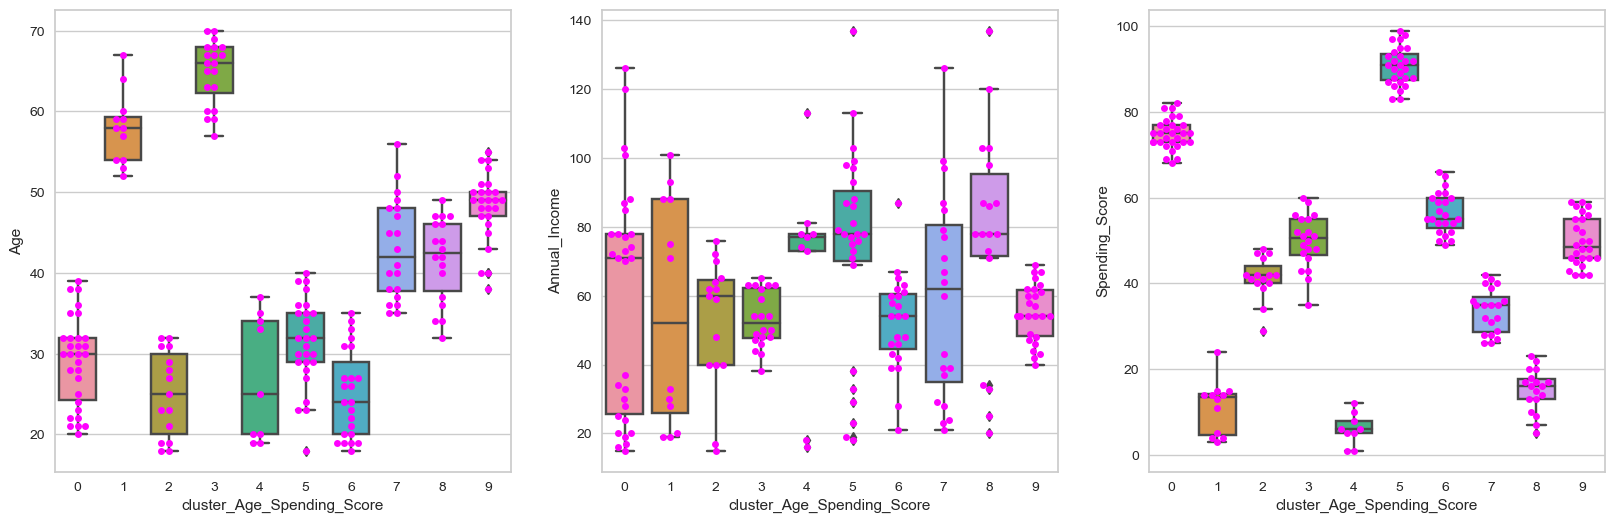

In [525]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

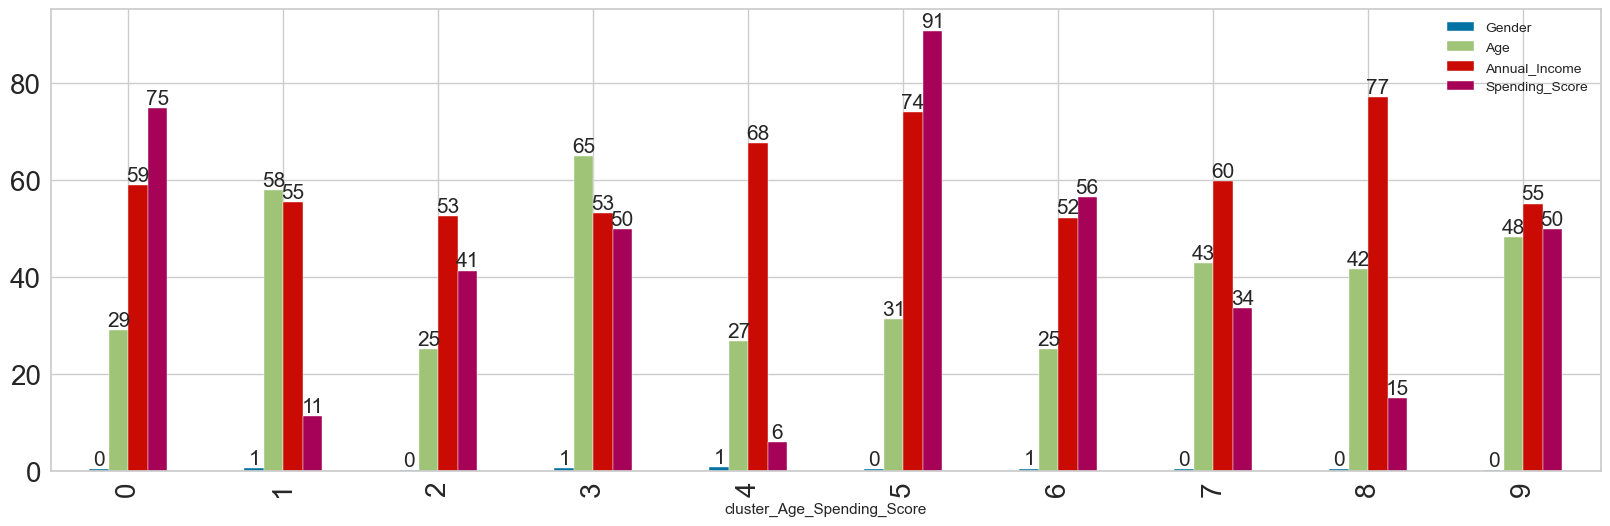

In [526]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)


#### Interpretation based on Annual Income and Spending Score- df2


In [527]:
df2

,Annual_Income,Spending_Score,Label,cluster_Agg,cluster_Kmeans
0,15,39,1,4,5
1,15,81,4,3,3
2,16,6,1,4,7
3,16,77,4,3,3
4,17,40,1,4,5
...,...,...,...,...,...
195,120,79,2,2,9
196,126,28,0,0,4
197,126,74,2,2,9
198,137,18,0,0,4


In [528]:
df2.cluster_Kmeans.value_counts()

cluster_Kmeans
1    43
8    42
2    22
3    21
6    18
0    14
7    12
5    11
4    10
9     7
Name: count, dtype: int64

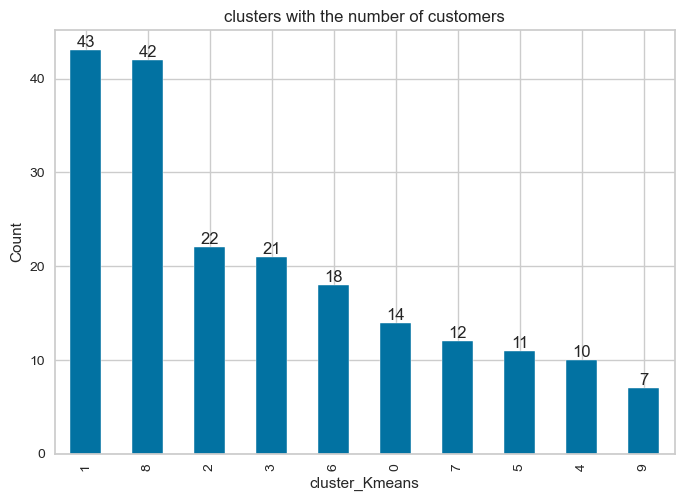

In [529]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [530]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,1,19,15,39,2
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,2


In [531]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [533]:
df["cluster_Annual_Income_Spending_Score"] = df2.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,7
3,0,23,16,77,3
4,0,31,17,40,5


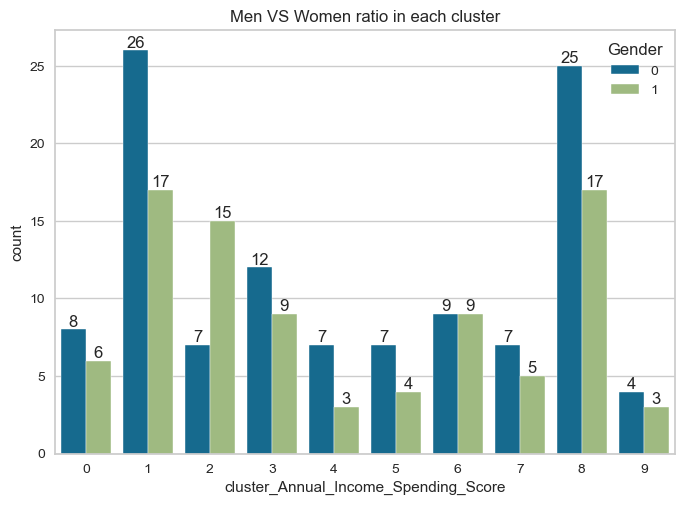

In [534]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [535]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
0      0                                     32.875000      76.500000   
       1                                     39.807692      64.153846   
       2                                     44.857143      79.571429   
       3                                     25.583333      24.583333   
       4                                     42.714286     107.000000   
       5                                     43.000000      29.857143   
       6                                     30.222222      84.000000   
       7                                     43.428571      24.857143   
       8                                     41.240000      47.080000   
       9                                     35.250000     109.750000   
1      0                                     32.666667      79.500000   
       1                                     44.529412      63.058824   
       2                                     39.200000      80.466667   
       3                                     25.000000      25.777778   
       4                                     37.000000     116.000000   
       5                                     38.500000      25.250000   
       6                                     34.777778      80.777778   
       7                                     56.200000      24.200000   
       8                                     46.352941      48.647059   
       9                                     30.000000     121.333333   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
0      0                                          74.500000  
       1                                          45.346154  
       2                                          15.714286  
       3                                          81.833333  
       4                                          25.571429  
       5                                          32.428571  
       6                                          88.333333  
       7                                          11.000000  
       8                                          52.080000  
       9                                          81.000000  
1      0                                          71.666667  
       1                                          47.411765  
       2                                          11.266667  
       3                                          77.666667  
       4                                          13.666667  
       5                                          34.750000  
       6                                          92.555556  
       7                                           7.600000  
       8                                          52.294118  
       9                                          75.000000

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

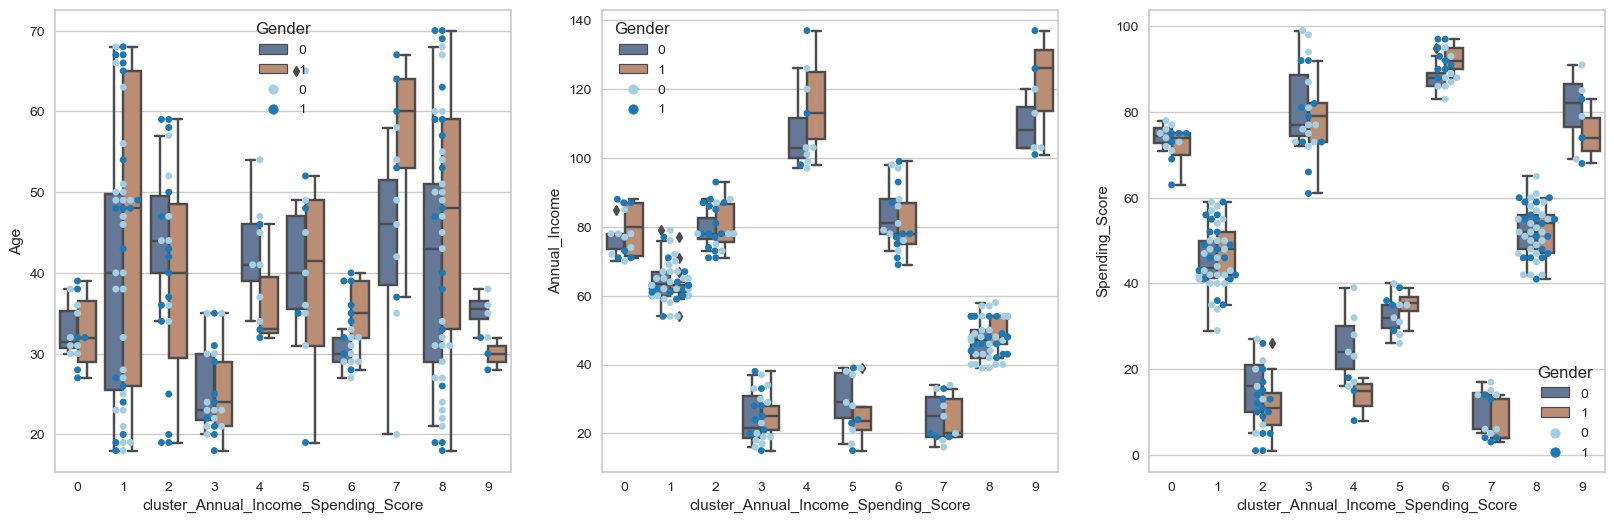

In [536]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

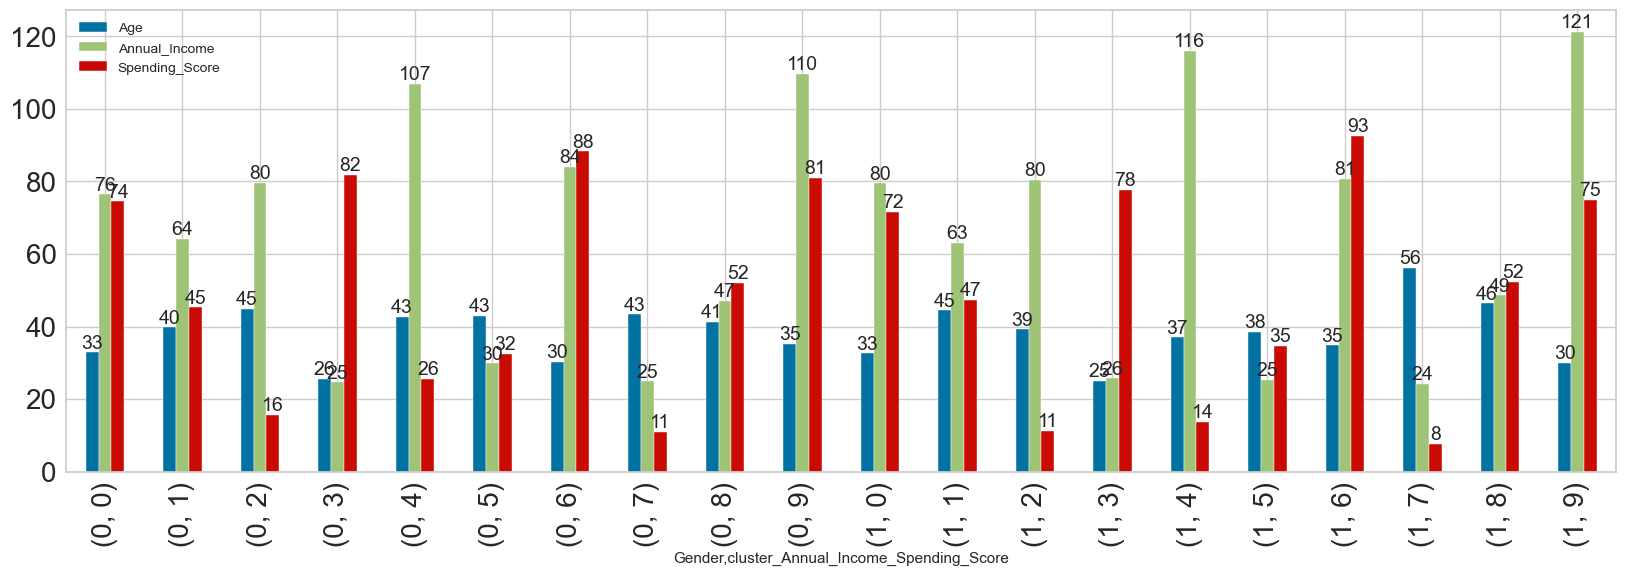

In [537]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

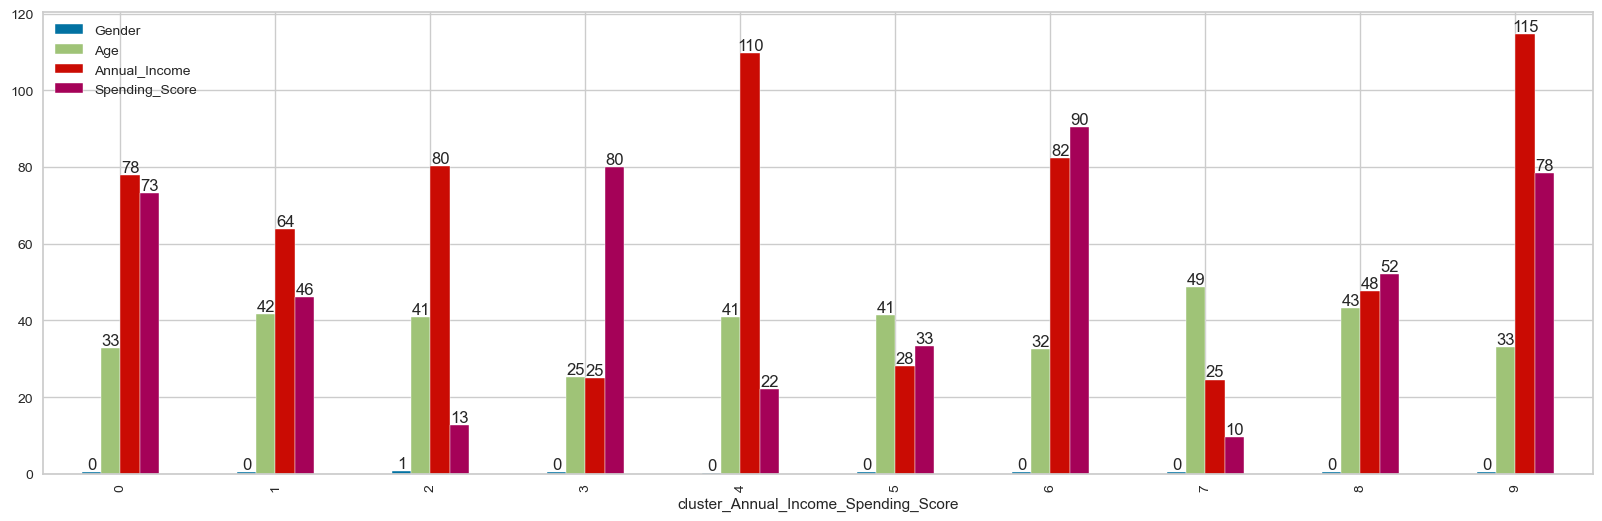

In [538]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___